<a href="https://colab.research.google.com/github/Nithin-Pranav/price-optima/blob/main/Dynamic_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
 df = pd.read_csv('/content/dynamic_pricing.csv')

In [3]:
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [4]:
df.tail()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
995,33,23,Urban,Gold,24,4.21,Morning,Premium,11,91.389526
996,84,29,Urban,Regular,92,4.55,Morning,Premium,94,424.155987
997,44,6,Suburban,Gold,80,4.13,Night,Premium,40,157.364830
998,53,27,Suburban,Regular,78,3.63,Night,Premium,58,279.095048
999,78,63,Rural,Gold,14,4.21,Afternoon,Economy,147,655.065106


In [5]:
print("Shape of dataset:", df.shape)

Shape of dataset: (1000, 10)


In [6]:
df.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


In [7]:
df.dtypes

,0
Number_of_Riders,int64
Number_of_Drivers,int64
Location_Category,object
Customer_Loyalty_Status,object
Number_of_Past_Rides,int64
Average_Ratings,float64
Time_of_Booking,object
Vehicle_Type,object
Expected_Ride_Duration,int64
Historical_Cost_of_Ride,float64


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.3+ KB


In [9]:
df.isnull().sum()

,0
Number_of_Riders,0
Number_of_Drivers,0
Location_Category,0
Customer_Loyalty_Status,0
Number_of_Past_Rides,0
Average_Ratings,0
Time_of_Booking,0
Vehicle_Type,0
Expected_Ride_Duration,0
Historical_Cost_of_Ride,0


In [10]:
df.columns.tolist()

['Number_of_Riders',
 'Number_of_Drivers',
 'Location_Category',
 'Customer_Loyalty_Status',
 'Number_of_Past_Rides',
 'Average_Ratings',
 'Time_of_Booking',
 'Vehicle_Type',
 'Expected_Ride_Duration',
 'Historical_Cost_of_Ride']

In [11]:
dup_count = df.duplicated().sum()
print("Duplicate rows:", dup_count)
if dup_count > 0:
    df = df.drop_duplicates().reset_index(drop=True)
    print("Duplicates dropped. New shape:", df.shape)

Duplicate rows: 0


In [12]:
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].str.strip().str.capitalize()
    print(f"\nUnique values for {col}: {df[col].unique()}")
    print(f"Value counts for {col}:\n{df[col].value_counts()}")


Unique values for Location_Category: ['Urban' 'Suburban' 'Rural']
Value counts for Location_Category:
Location_Category
Urban       346
Rural       332
Suburban    322
Name: count, dtype: int64

Unique values for Customer_Loyalty_Status: ['Silver' 'Regular' 'Gold']
Value counts for Customer_Loyalty_Status:
Customer_Loyalty_Status
Silver     367
Regular    320
Gold       313
Name: count, dtype: int64

Unique values for Time_of_Booking: ['Night' 'Evening' 'Afternoon' 'Morning']
Value counts for Time_of_Booking:
Time_of_Booking
Night        276
Afternoon    247
Morning      246
Evening      231
Name: count, dtype: int64

Unique values for Vehicle_Type: ['Premium' 'Economy']
Value counts for Vehicle_Type:
Vehicle_Type
Premium    522
Economy    478
Name: count, dtype: int64


In [13]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)][col].count()
    outlier_pct = (outliers / len(df)) * 100
    print(f"{col}: {outliers} outliers ({outlier_pct:.2f}%)")

Number_of_Riders: 0 outliers (0.00%)
Number_of_Drivers: 10 outliers (1.00%)
Number_of_Past_Rides: 0 outliers (0.00%)
Average_Ratings: 0 outliers (0.00%)
Expected_Ride_Duration: 0 outliers (0.00%)
Historical_Cost_of_Ride: 0 outliers (0.00%)


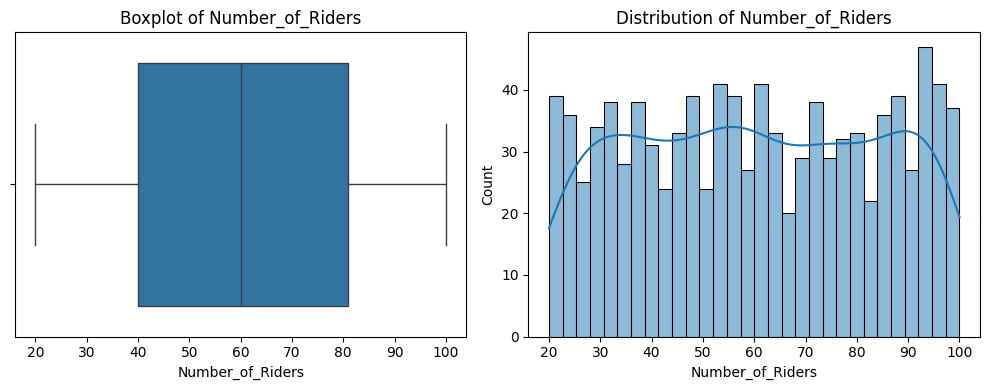

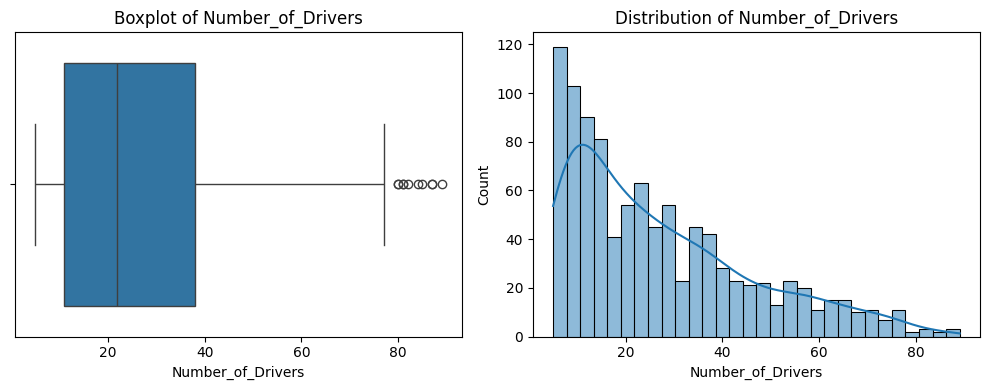

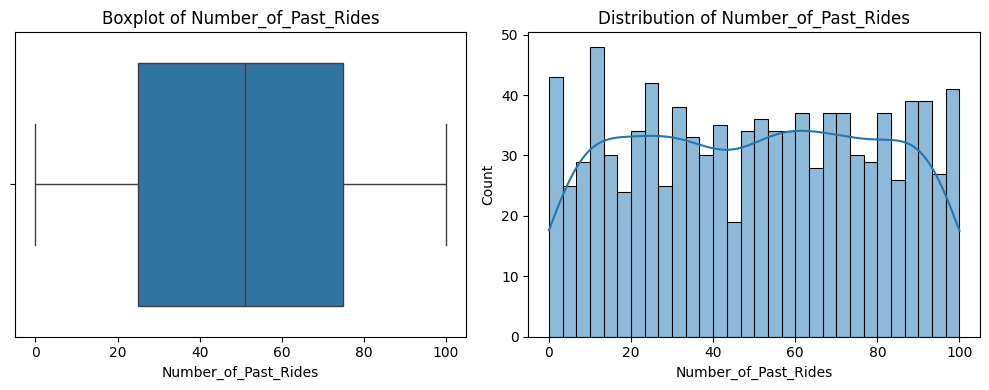

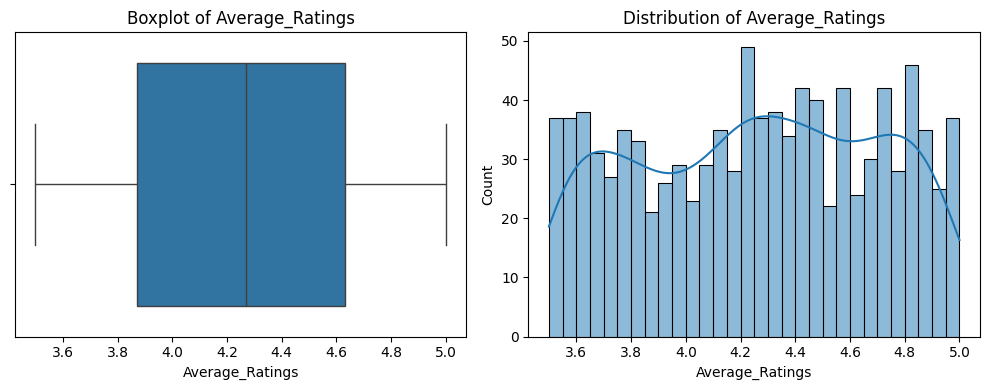

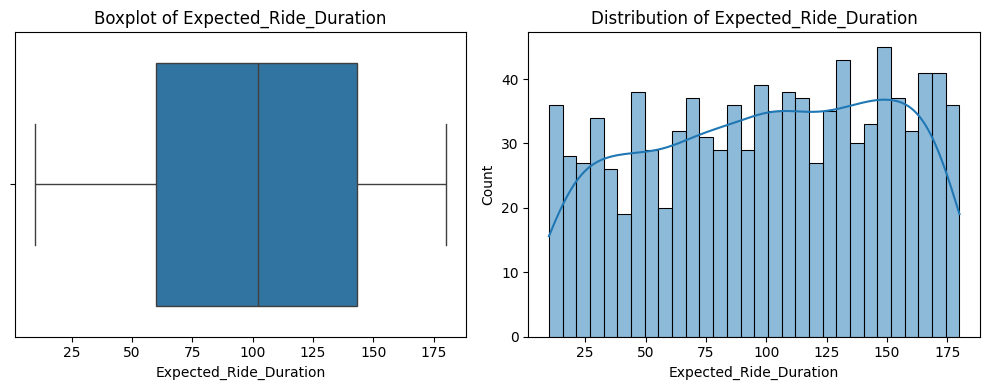

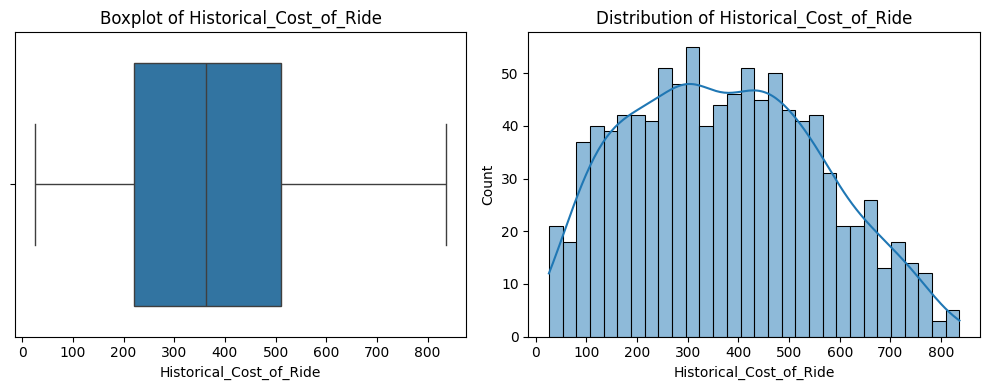

In [14]:
for col in numeric_cols:
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")

    plt.subplot(1, 2, 2)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")

    plt.tight_layout()
    plt.show()

In [15]:
df_numeric = df.select_dtypes(include=[np.number])
corr = df_numeric.corr()
print(corr)

                         Number_of_Riders  Number_of_Drivers  \
Number_of_Riders                 1.000000           0.627016   
Number_of_Drivers                0.627016           1.000000   
Number_of_Past_Rides             0.029265           0.039660   
Average_Ratings                  0.008572           0.041204   
Expected_Ride_Duration          -0.015856          -0.024418   
Historical_Cost_of_Ride          0.005826           0.017082   

                         Number_of_Past_Rides  Average_Ratings  \
Number_of_Riders                     0.029265         0.008572   
Number_of_Drivers                    0.039660         0.041204   
Number_of_Past_Rides                 1.000000        -0.064734   
Average_Ratings                     -0.064734         1.000000   
Expected_Ride_Duration               0.030679        -0.016968   
Historical_Cost_of_Ride              0.035859        -0.001063   

                         Expected_Ride_Duration  Historical_Cost_of_Ride  
Number_of_Rid

In [16]:
target = "Historical_Cost_of_Ride"
if target in corr.columns:
    print(f"\nCorrelation with the target variable '{target}':")
    print(corr[target].sort_values(ascending=False))


Correlation with the target variable 'Historical_Cost_of_Ride':
Historical_Cost_of_Ride    1.000000
Expected_Ride_Duration     0.927547
Number_of_Past_Rides       0.035859
Number_of_Drivers          0.017082
Number_of_Riders           0.005826
Average_Ratings           -0.001063
Name: Historical_Cost_of_Ride, dtype: float64


In [17]:
for col in ["Location_Category", "Customer_Loyalty_Status", "Vehicle_Type", "Time_of_Booking"]:
    if col in df.columns:
        print(f"\nAnalysis by {col}:")
        print(df.groupby(col)[target].agg(["count", "mean", "median", "std"]).sort_values("mean", ascending=False))


Analysis by Location_Category:
                   count        mean      median         std
Location_Category                                           
Rural                332  379.942172  367.756592  187.224517
Suburban             322  374.319486  362.699542  187.343980
Urban                346  363.673259  359.955839  187.106320

Analysis by Customer_Loyalty_Status:
                         count        mean      median         std
Customer_Loyalty_Status                                           
Regular                    320  380.125251  358.951011  189.611633
Gold                       313  376.118746  373.975636  184.967070
Silver                     367  362.772140  348.669562  186.956263

Analysis by Vehicle_Type:
              count        mean      median         std
Vehicle_Type                                           
Premium         522  396.246242  397.587527  184.316822
Economy         478  346.573399  331.230917  186.987292

Analysis by Time_of_Booking:
         

In [18]:
print("\nSkewness of Numerical Features:")
for col in numeric_cols:
    print(f"{col}: {df[col].skew():.2f}")


Skewness of Numerical Features:
Number_of_Riders: 0.00
Number_of_Drivers: 0.96
Number_of_Past_Rides: -0.01
Average_Ratings: -0.08
Expected_Ride_Duration: -0.14
Historical_Cost_of_Ride: 0.21


In [19]:
import pandas as pd
import numpy as np

def compute_kpis(
    df_base: pd.DataFrame,
    df_scn: pd.DataFrame,
    *,
    pcomplete_col="p_complete",
    intents_col="Number_of_Riders",
    price_col="price",
    cost_col="Historical_Cost_of_Ride"
):

    # -- Demand (Booking Intents) --
    intents_base = df_base[intents_col].astype(float).clip(lower=1)
    intents_scn = df_scn[intents_col].astype(float).clip(lower=1)

    # -- Completed Rides --
    comp_base = intents_base * df_base[pcomplete_col].astype(float)
    comp_scn = intents_scn * df_scn[pcomplete_col].astype(float)

    # -- Revenue --
    rev_base = (df_base[price_col].astype(float) * comp_base).sum()
    rev_scn = (df_scn[price_col].astype(float) * comp_scn).sum()

    # -- Cost --
    cost_base = (df_base[cost_col].astype(float) * comp_base).sum()
    cost_scn = (df_scn[cost_col].astype(float) * comp_scn).sum()

    # -- Revenue Lift (%) --
    revenue_lift_pct = (rev_scn - rev_base) / max(rev_base, 1e-9) * 100.0

    # -- Gross Margin (%) --
    gm_base = (rev_base - cost_base) / max(rev_base, 1e-9) * 100.0
    gm_scn = (rev_scn - cost_scn) / max(rev_scn, 1e-9) * 100.0

    # -- Conversion Rate (%) --
    conv_base = (comp_base.sum() / intents_base.sum()) * 100.0
    conv_scn = (comp_scn.sum() / intents_scn.sum()) * 100.0

    # -- Cancellation Rate (%) --
    canc_base = 100.0 - conv_base
    canc_scn = 100.0 - conv_scn

    # -- Price Change Rate (%) --
    price_change_rate = (
        (df_base[price_col].astype(float) != df_scn[price_col].astype(float))
        .mean() * 100.0
    )

    results = {
        "Revenue (₹) Baseline": round(rev_base, 2),
        "Revenue (₹) Scenario": round(rev_scn, 2),
        "Revenue Lift (%)": round(revenue_lift_pct, 2),
        "Gross Margin (Baseline %)": round(gm_base, 2),
        "Gross Margin (Scenario %)": round(gm_scn, 2),
        "Conversion Rate (Baseline %)": round(conv_base, 2),
        "Conversion Rate (Scenario %)": round(conv_scn, 2),
        "Cancellation Rate (Baseline %)": round(canc_base, 2),
        "Cancellation Rate (Scenario %)": round(canc_scn, 2),
        "Price Change Rate (%)": round(price_change_rate, 2),
    }

In [20]:
import numpy as np
import pandas as pd
from IPython.display import display

df_fe = df.copy()

num_cols = df_fe.select_dtypes(include="number").columns.tolist()
cat_cols = df_fe.select_dtypes(exclude="number").columns.tolist()

# 3.1 Loyalty score
if "Customer_Loyalty_Status" in df_fe.columns:
    _loy_map = {"Regular": 0, "Silver": 1, "Gold": 2}
    df_fe["Loyalty_Score"] = df_fe["Customer_Loyalty_Status"].map(_loy_map).fillna(0).astype(int)

# 3.2 Ratios / resource pressure
if "Number_of_Riders" in df_fe.columns and "Number_of_Drivers" in df_fe.columns:
    df_fe["Rider_Driver_Ratio"] = df_fe["Number_of_Riders"] / (df_fe["Number_of_Drivers"].clip(lower=1))
    df_fe["Driver_to_Rider_Ratio"] = df_fe["Number_of_Drivers"] / (df_fe["Number_of_Riders"].clip(lower=1))
    df_fe["Supply_Tightness"] = 1.0 / df_fe["Driver_to_Rider_Ratio"]

# 3.3 Cost granularity
if "Historical_Cost_of_Ride" in df_fe.columns and "Expected_Ride_Duration" in df_fe.columns:
    df_fe["Cost_per_Min"] = df_fe["Historical_Cost_of_Ride"] / (df_fe["Expected_Ride_Duration"].clip(lower=1))

# 3.4 Vehicle factor
if "Vehicle_Type" in df_fe.columns:
    _veh_map = {"Economy": 1.0, "Premium": 1.25}
    df_fe["Vehicle_Factor"] = df_fe["Vehicle_Type"].map(_veh_map).astype(float).fillna(1.1)

# 3.5 Peak indicator
if "Time_of_Booking" in df_fe.columns:
    df_fe["Peak"] = df_fe["Time_of_Booking"].isin(["Morning", "Evening"]).astype(int)

# 3.6 Inventory Health proxy
if {"Number_of_Drivers", "Number_of_Riders", "Supply_Tightness"}.issubset(df_fe.columns):
    df_fe["Inventory_Health_Index"] = (
        0.6 * (df_fe["Number_of_Drivers"] / df_fe["Number_of_Riders"].clip(lower=1)).clip(upper=2.0)
        + 0.4 * (1.0 - df_fe["Supply_Tightness"].clip(upper=2.0) / 2.0)
    )

# 3.7 Baseline price
def _baseline_price_row(r):
    cost = float(r["Historical_Cost_of_Ride"])
    v_adj = {"Economy": 1.10, "Premium": 1.22}
    t_adj = {"Morning": 1.02, "Afternoon": 1.00, "Evening": 1.04, "Night": 1.01}
    l_adj = {"Urban": 1.03, "Suburban": 1.02, "Rural": 0.98}
    base = cost * 1.15
    base *= v_adj.get(str(r.get("Vehicle_Type", "Economy")), 1.12)
    base *= t_adj.get(str(r.get("Time_of_Booking", "Afternoon")), 1.00)
    base *= l_adj.get(str(r.get("Location_Category", "Urban")), 1.00)
    return max(base, cost * 1.12)

if "Historical_Cost_of_Ride" in df_fe.columns:
    df_fe["baseline_price"] = df_fe.apply(_baseline_price_row, axis=1).round(2)

# 3.8 Competitor price index
np.random.seed(42)
if "baseline_price" in df_fe.columns:
    if "competitor_price" not in df_fe.columns:
        df_fe["competitor_price"] = (
            df_fe["baseline_price"] * np.random.uniform(0.94, 1.02, size=len(df_fe))
        ).round(2)
    df_fe["Competitor_Price_Index"] = (
        df_fe["baseline_price"] / df_fe["competitor_price"]
    ).replace([np.inf, -np.inf], np.nan)

# 3.9 Placeholder "price" & "p_complete"
if "baseline_price" in df_fe.columns:
    df_fe["price"] = df_fe["baseline_price"]

def estimate_p_complete(row, price):
    cost = float(row["Historical_Cost_of_Ride"])
    rel = (price / max(cost, 1e-6)) - 1.0
    ratio = float(row.get("Driver_to_Rider_Ratio", 1.0))
    loy = float(row.get("Loyalty_Score", 0))
    peak = float(row.get("Peak", 0))
    veh = float(row.get("Vehicle_Factor", 1.0))

    x = (
        -0.3
        + 0.9 * ratio
        + 0.12 * loy
        - 0.08 * peak
        - 0.45 * rel
        - 0.02 * (veh - 1.0)
    )
    x = np.clip(x, -40, 40)
    p = 1.0 / (1.0 + np.exp(-x))
    return float(np.clip(p, 0.02, 0.98))

df_fe["p_complete"] = df_fe.apply(lambda r: estimate_p_complete(r, r["price"]), axis=1)

print("Engineered columns added:")
print(sorted(set(df_fe.columns) - set(df.columns)))
display(df_fe.head(3))

Engineered columns added:
['Competitor_Price_Index', 'Cost_per_Min', 'Driver_to_Rider_Ratio', 'Inventory_Health_Index', 'Loyalty_Score', 'Peak', 'Rider_Driver_Ratio', 'Supply_Tightness', 'Vehicle_Factor', 'baseline_price', 'competitor_price', 'p_complete', 'price']


,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride,...,Supply_Tightness,Cost_per_Min,Vehicle_Factor,Peak,Inventory_Health_Index,baseline_price,competitor_price,Competitor_Price_Index,price,p_complete
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273,...,2.000000,3.158414,1.25,0,0.300000,414.89,402.43,1.030962,414.89,0.514546
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753,...,1.487179,4.043599,1.00,1,0.506012,233.32,237.07,0.984182,233.32,0.547686
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469,...,1.354839,4.339414,1.25,0,0.571889,453.45,452.80,1.001436,453.45,0.577022


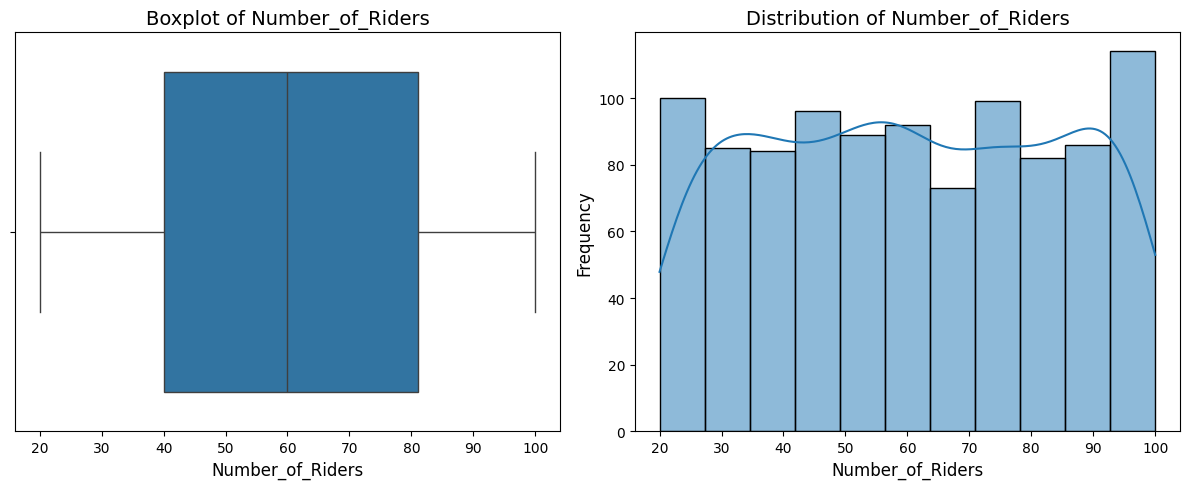

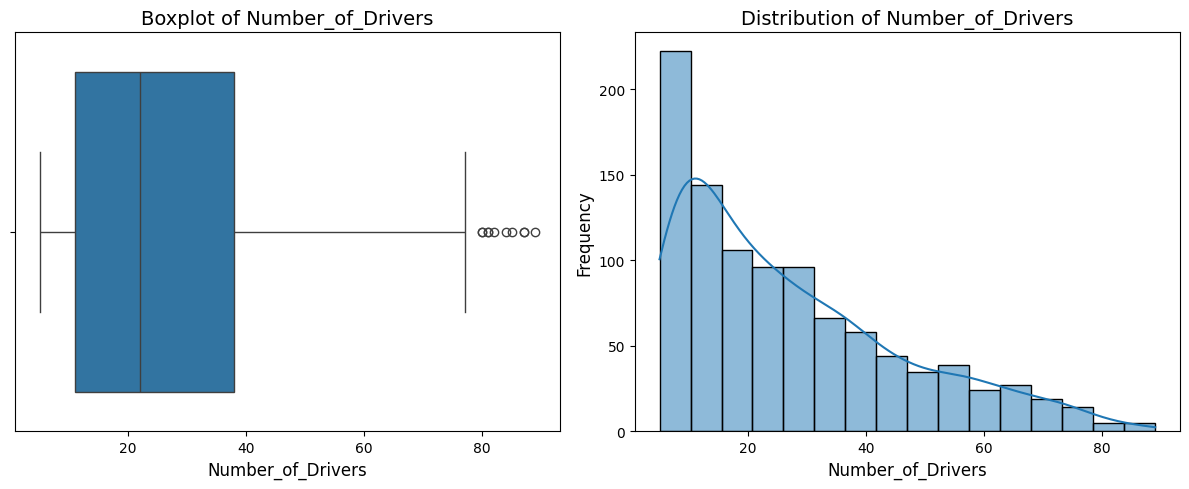

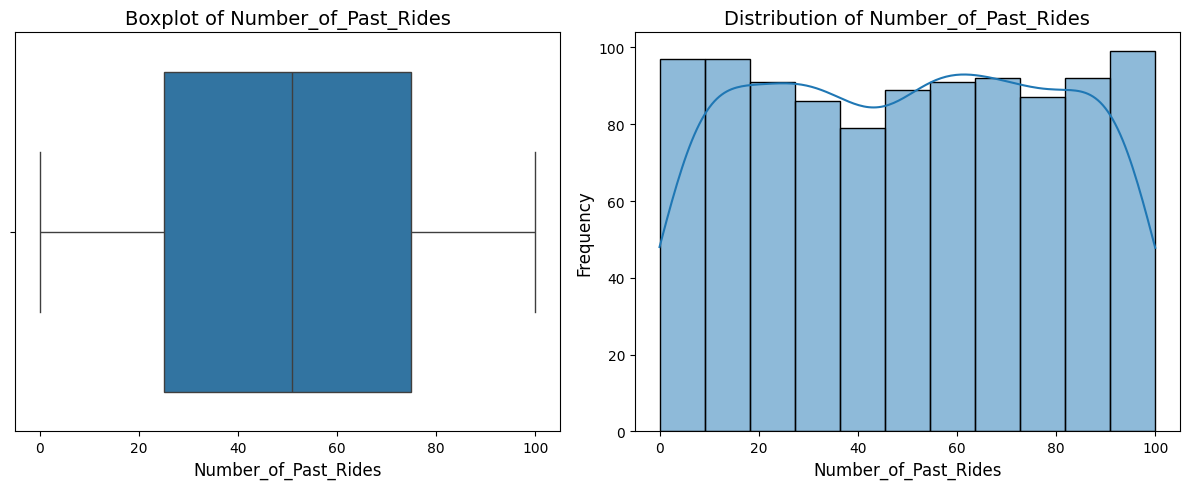

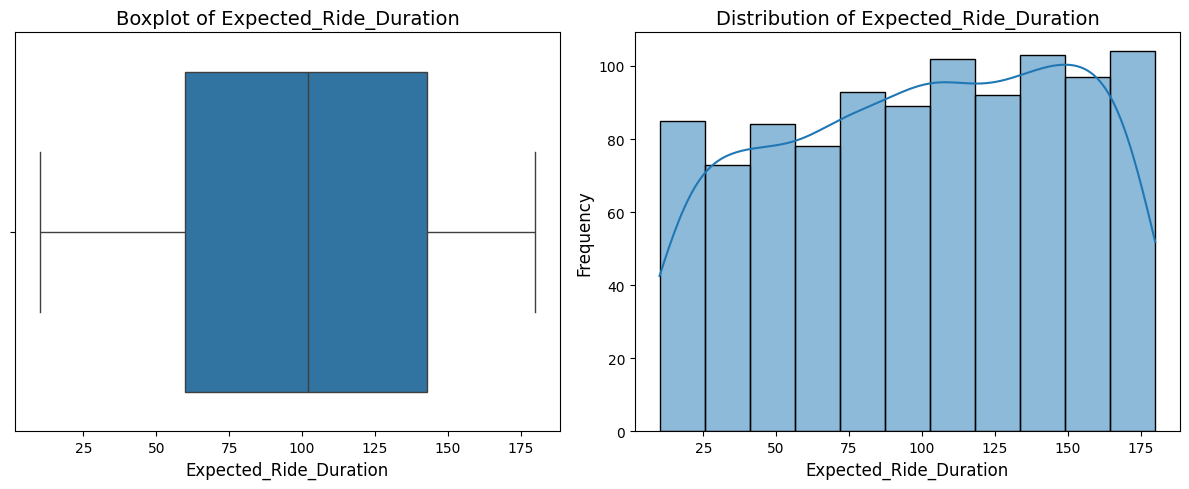

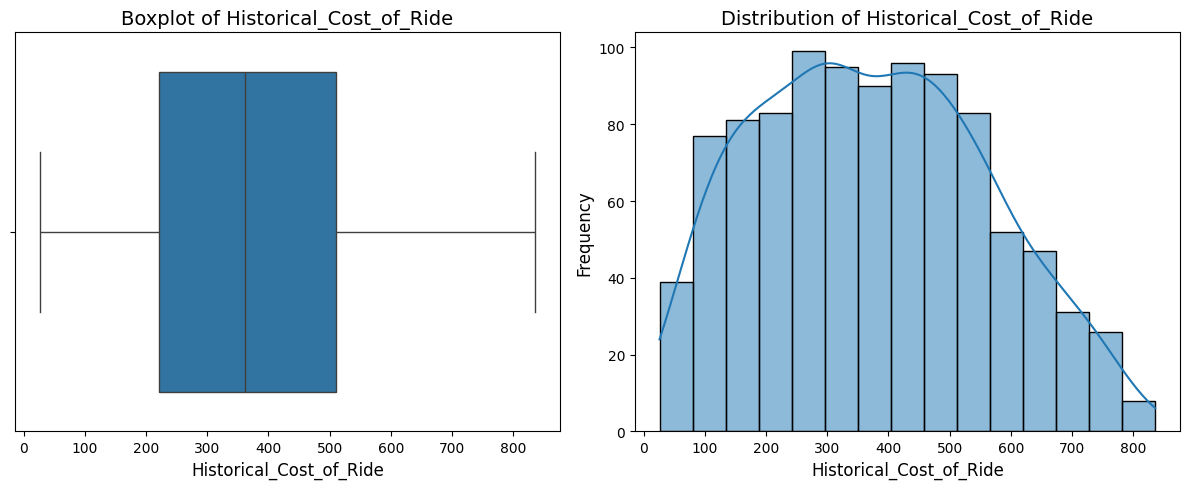

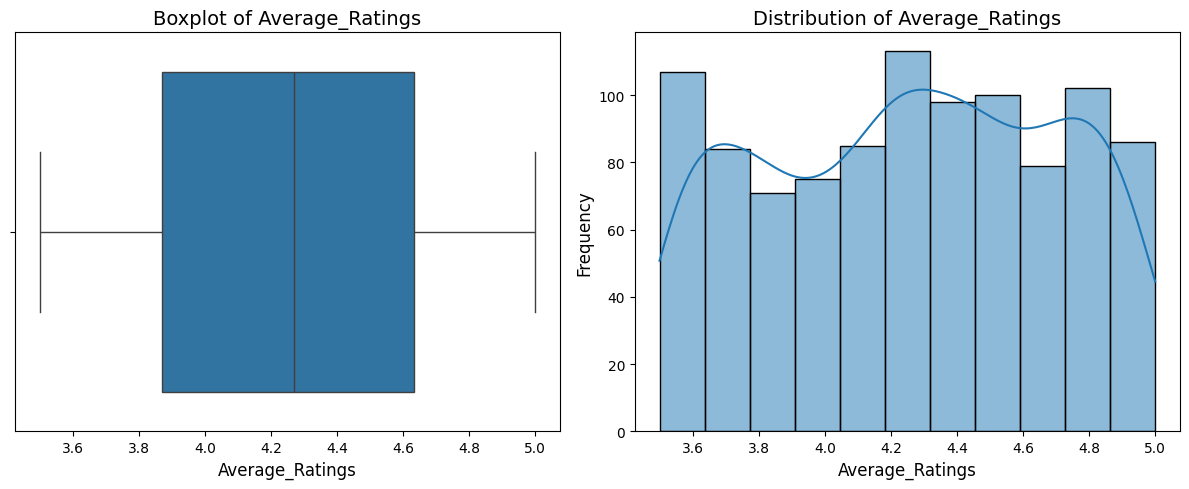

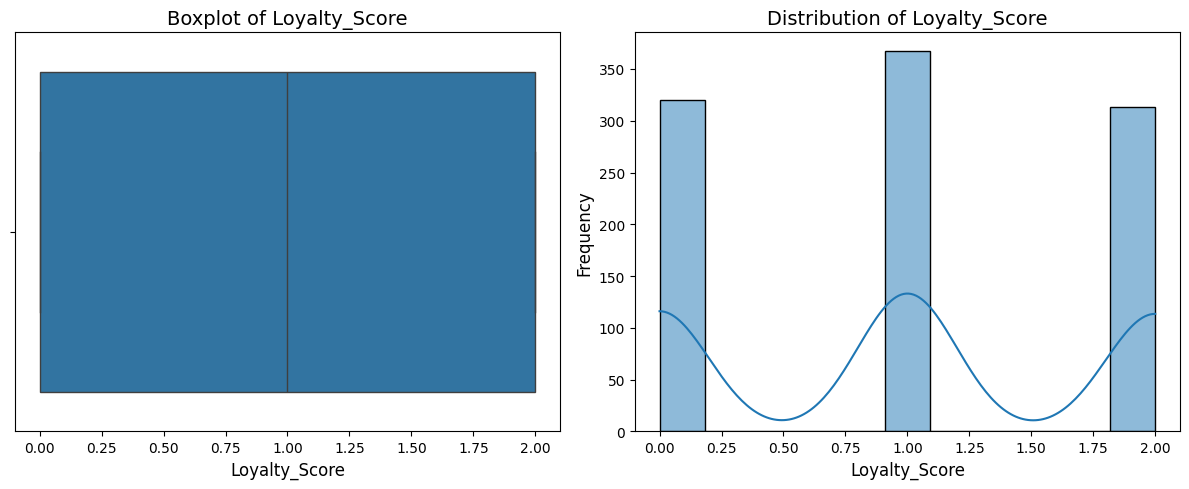

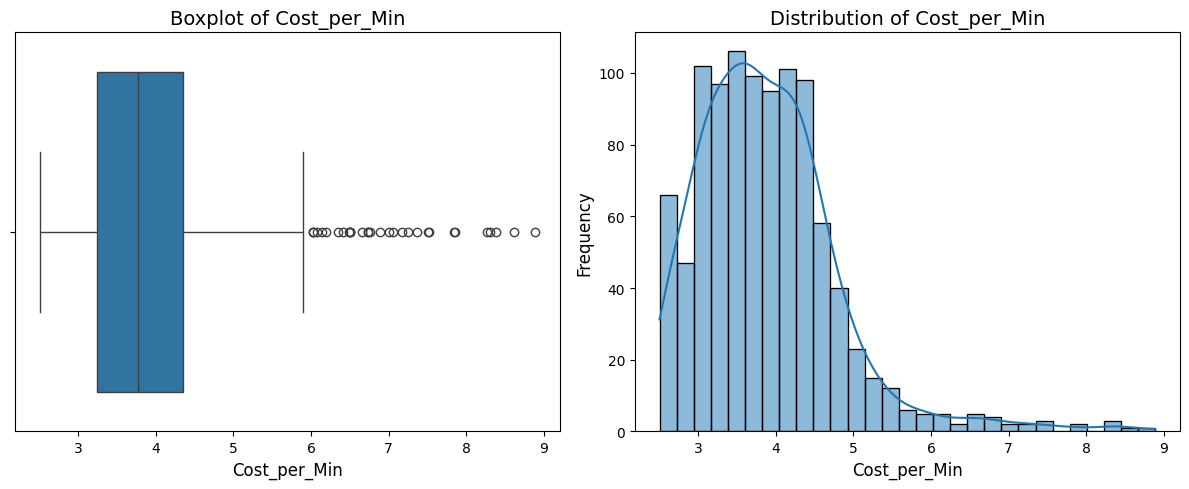


--- Visualizing Categorical Feature Counts ---


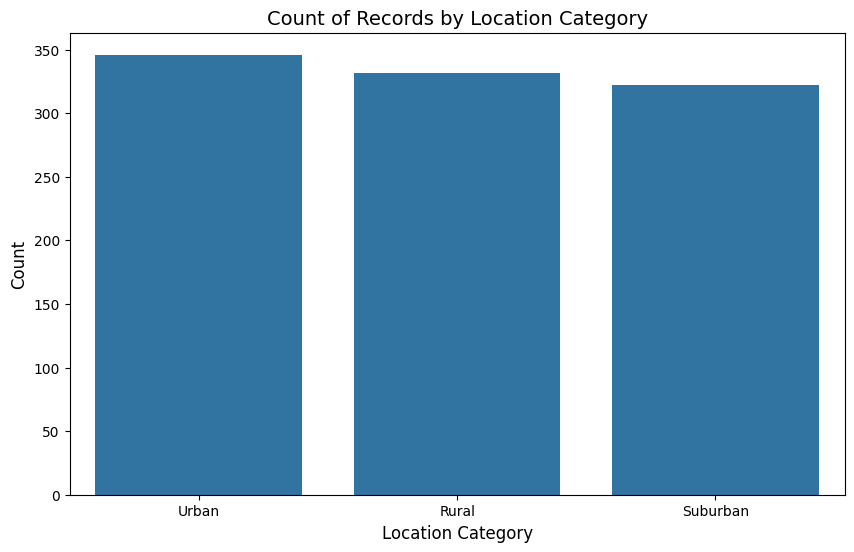

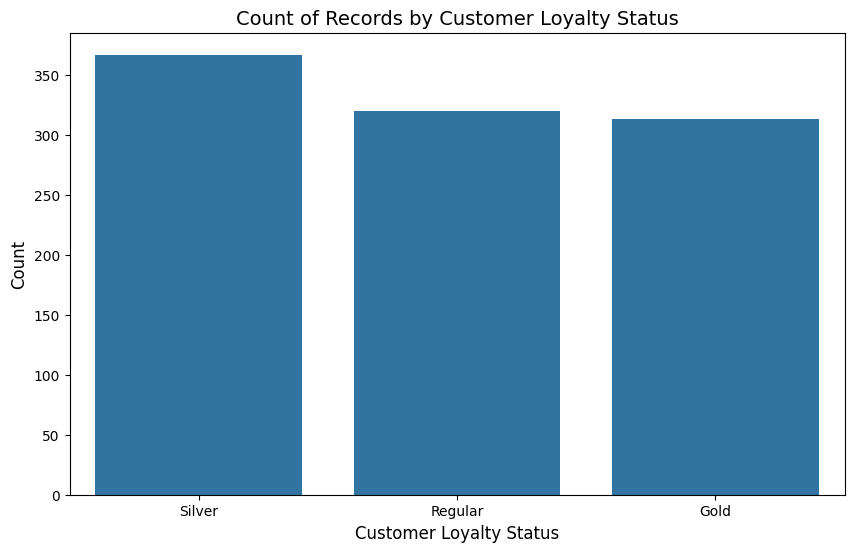

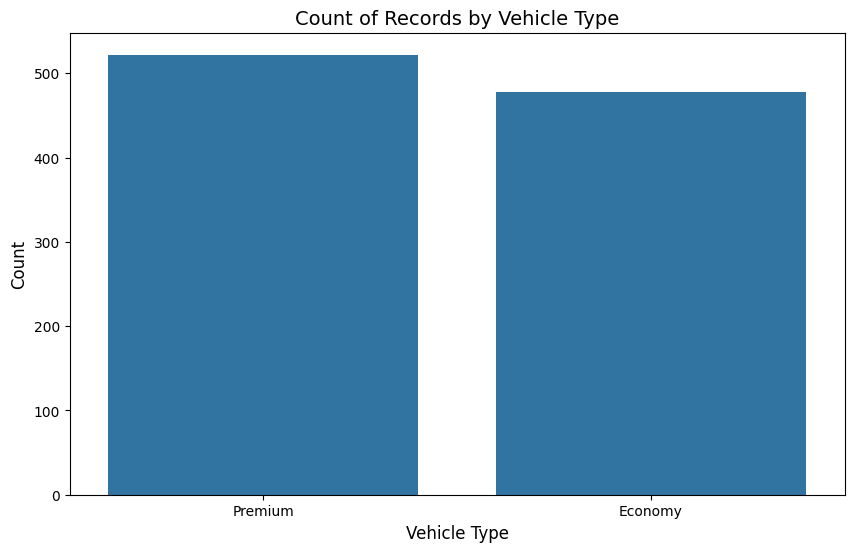

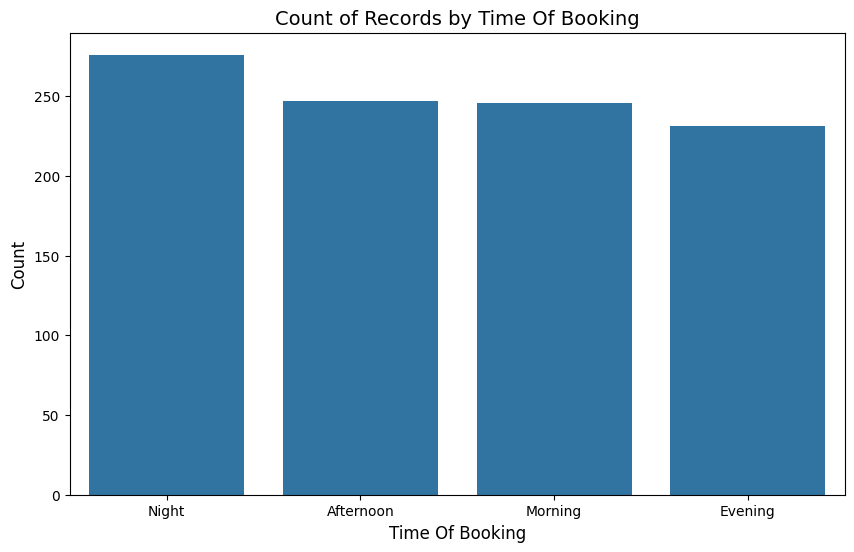


--- Visualizing Key Relationships ---


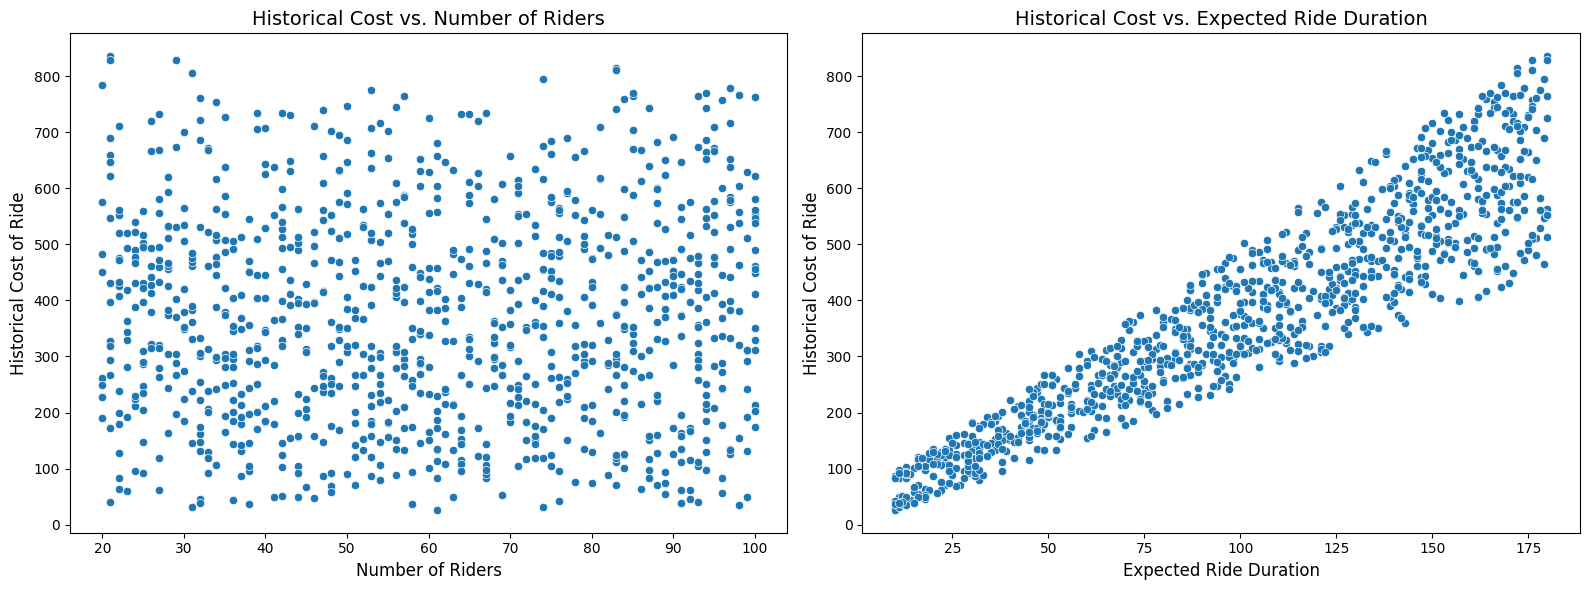


--- Visualizing Conversion Rate by Segment ---


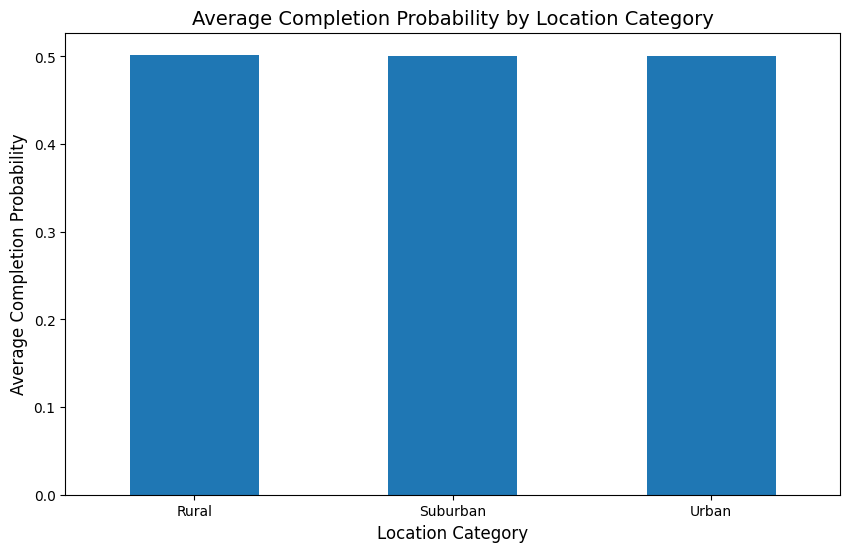

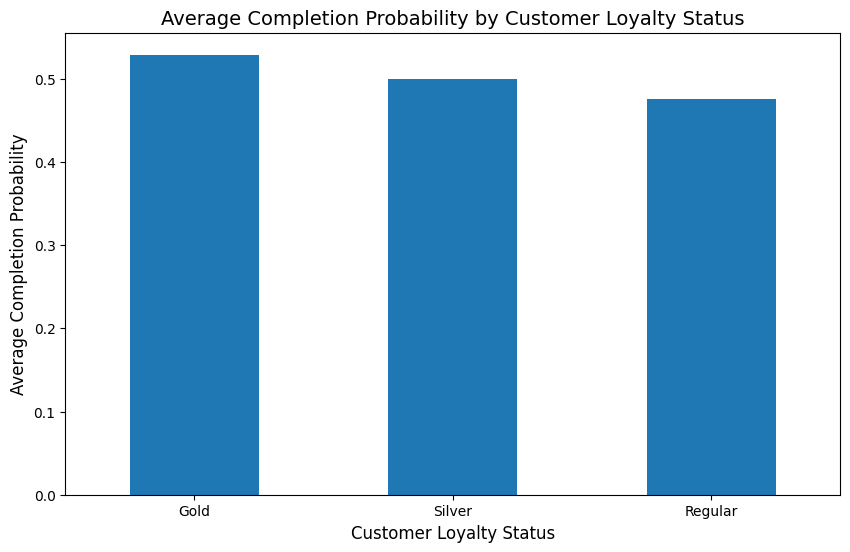

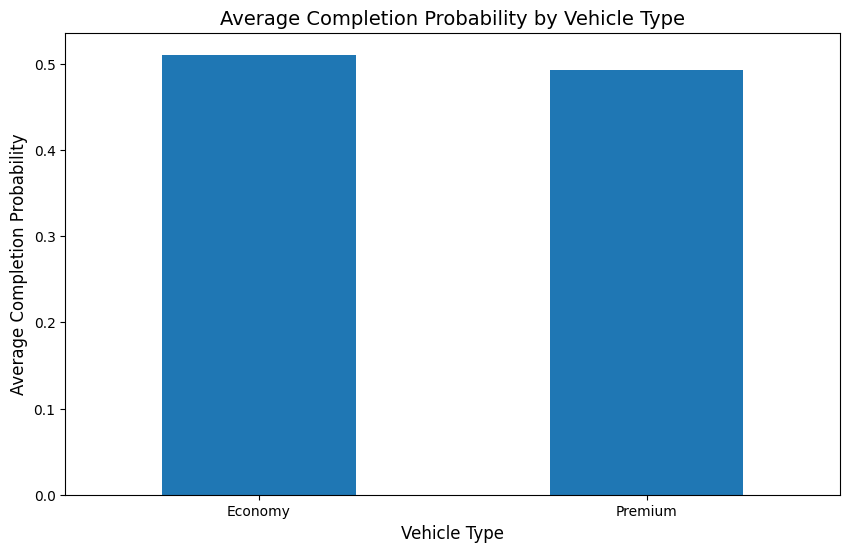

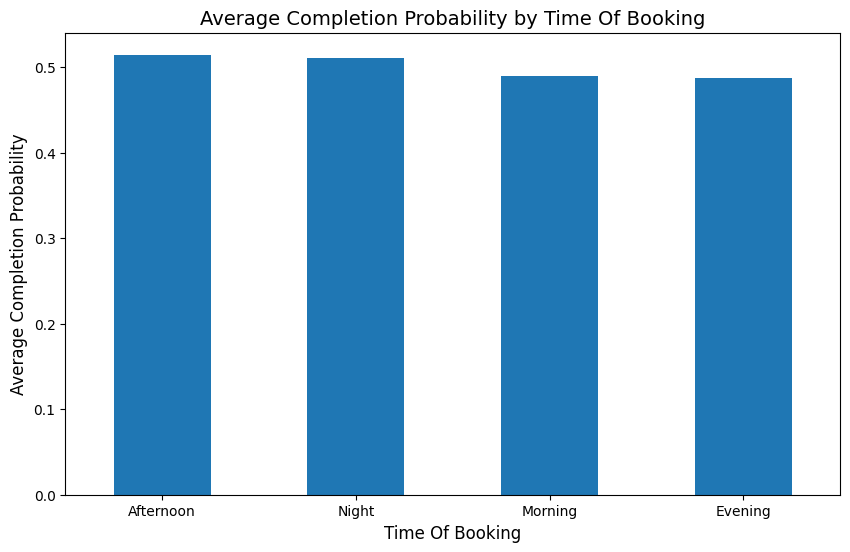


--- Correlation Heatmap of Key Engineered Features ---


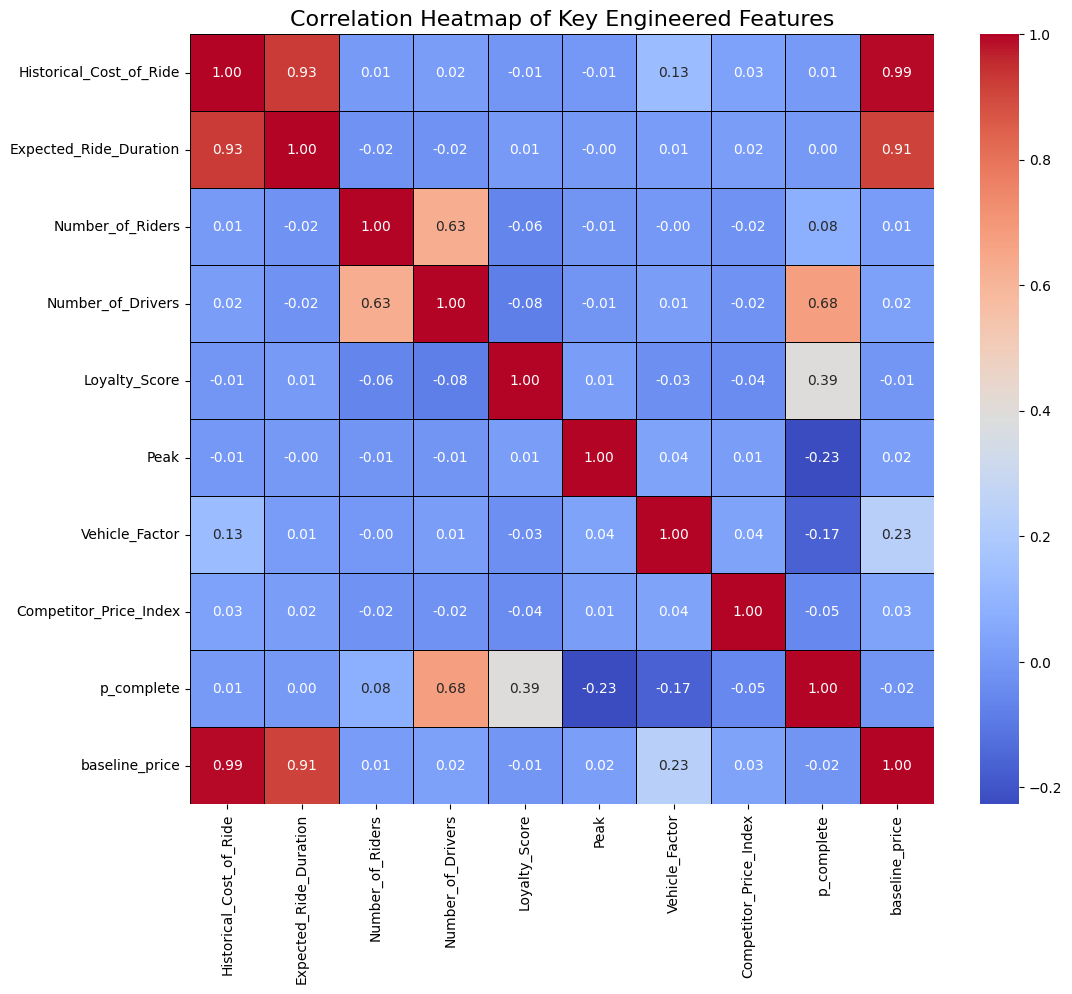

In [21]:
numeric_cols = df_fe.select_dtypes(include=[np.number]).columns.tolist()
# Exclude new ratio columns for clarity in this view
features_to_plot = ['Number_of_Riders', 'Number_of_Drivers', 'Number_of_Past_Rides', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride', 'Average_Ratings', 'Loyalty_Score', 'Cost_per_Min']

for col in features_to_plot:
    if col in df_fe.columns:
        plt.figure(figsize=(12, 5))

        # Boxplot for Outlier View
        plt.subplot(1, 2, 1)
        sns.boxplot(x=df_fe[col])
        plt.title(f"Boxplot of {col}", fontsize=14)
        plt.xlabel(col, fontsize=12)

        # Histogram for Numeric Distribution
        plt.subplot(1, 2, 2)
        sns.histplot(df_fe[col], kde=True)
        plt.title(f"Distribution of {col}", fontsize=14)
        plt.xlabel(col, fontsize=12)
        plt.ylabel("Frequency", fontsize=12)

        plt.tight_layout()
        plt.show()

# 3.2 Categorical counts
print("\n--- Visualizing Categorical Feature Counts ---")
categorical_cols = ['Location_Category', 'Customer_Loyalty_Status', 'Vehicle_Type', 'Time_of_Booking']
for col in categorical_cols:
    if col in df_fe.columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=col, data=df_fe, order=df_fe[col].value_counts().index)
        plt.title(f"Count of Records by {col.replace('_', ' ').title()}", fontsize=14)
        plt.xlabel(col.replace('_', ' ').title(), fontsize=12)
        plt.ylabel("Count", fontsize=12)
        plt.show()

# 3.3 Relationships
print("\n--- Visualizing Key Relationships ---")

# Scatter plot of key variables against the target variable
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Relationship between Number of Riders and Historical Cost of Ride
sns.scatterplot(x='Number_of_Riders', y='Historical_Cost_of_Ride', data=df_fe, ax=ax[0])
ax[0].set_title('Historical Cost vs. Number of Riders', fontsize=14)
ax[0].set_xlabel('Number of Riders', fontsize=12)
ax[0].set_ylabel('Historical Cost of Ride', fontsize=12)

# Relationship between Expected Ride Duration and Historical Cost of Ride
sns.scatterplot(x='Expected_Ride_Duration', y='Historical_Cost_of_Ride', data=df_fe, ax=ax[1])
ax[1].set_title('Historical Cost vs. Expected Ride Duration', fontsize=14)
ax[1].set_xlabel('Expected Ride Duration', fontsize=12)
ax[1].set_ylabel('Historical Cost of Ride', fontsize=12)

plt.tight_layout()
plt.show()

# 3.4 Conversion by segments (using our p_complete proxy)
print("\n--- Visualizing Conversion Rate by Segment ---")

# Bar plots of the mean p_complete for each categorical feature
for col in categorical_cols:
    if col in df_fe.columns and 'p_complete' in df_fe.columns:
        plt.figure(figsize=(10, 6))
        df_fe.groupby(col)['p_complete'].mean().sort_values(ascending=False).plot(kind='bar')
        plt.title(f"Average Completion Probability by {col.replace('_', ' ').title()}", fontsize=14)
        plt.xlabel(col.replace('_', ' ').title(), fontsize=12)
        plt.ylabel("Average Completion Probability", fontsize=12)
        plt.xticks(rotation=0)
        plt.show()

# 3.5 Correlation heatmap (key engineered features)
print("\n--- Correlation Heatmap of Key Engineered Features ---")
# Select a subset of relevant features for the heatmap
heatmap_cols = ['Historical_Cost_of_Ride', 'Expected_Ride_Duration', 'Number_of_Riders',
                'Number_of_Drivers', 'Loyalty_Score', 'Peak', 'Vehicle_Factor',
                'Competitor_Price_Index', 'p_complete', 'baseline_price']

# Calculate the correlation matrix
corr_matrix = df_fe[heatmap_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            linewidths=.5, linecolor='black')
plt.title('Correlation Heatmap of Key Engineered Features', fontsize=16)
plt.show()

                 mean_conv  mean_price  total_intents
Time_of_Booking                                      
Afternoon         0.514532  514.670648          14708
Night             0.511080  502.061848          17009
Morning           0.489673  521.136626          14675
Evening           0.487005  516.159177          13980


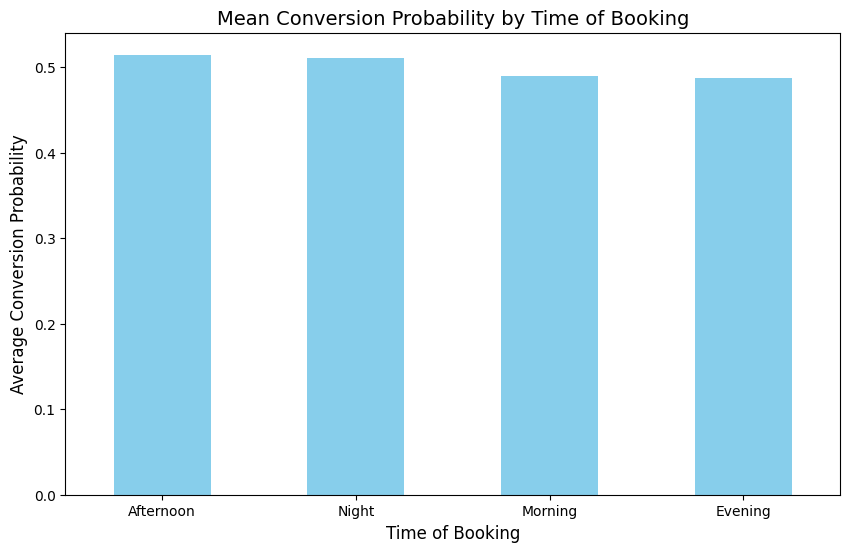


--- 3.2 Competitor Pressure: Price Gap Analysis ---
              avg_gap_pct  mean_comp_price  mean_our_price
Vehicle_Type                                              
Economy          2.088394       440.913766      450.125628
Premium          2.264239       558.455134      570.814272


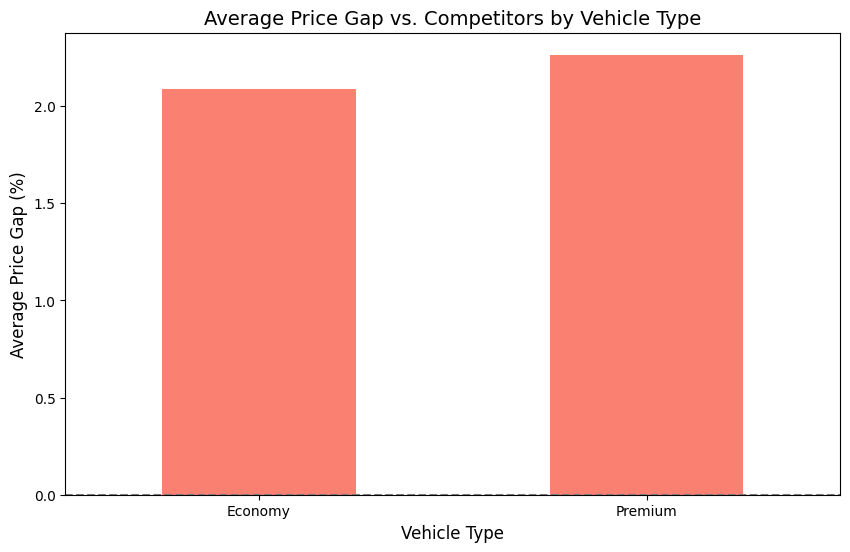


--- 3.3 Inventory Health Bands & Conversion ---
                mean_conv  mean_price  count
Inventory_Band                              
Very Tight       0.471073  511.942086    628
Tight            0.545752  522.403150    327
Balanced         0.595796  462.214222     45
Loose                 NaN         NaN      0


/tmp/ipython-input-2804929995.py:49: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  inv_summary = df_fe.groupby("Inventory_Band").agg(


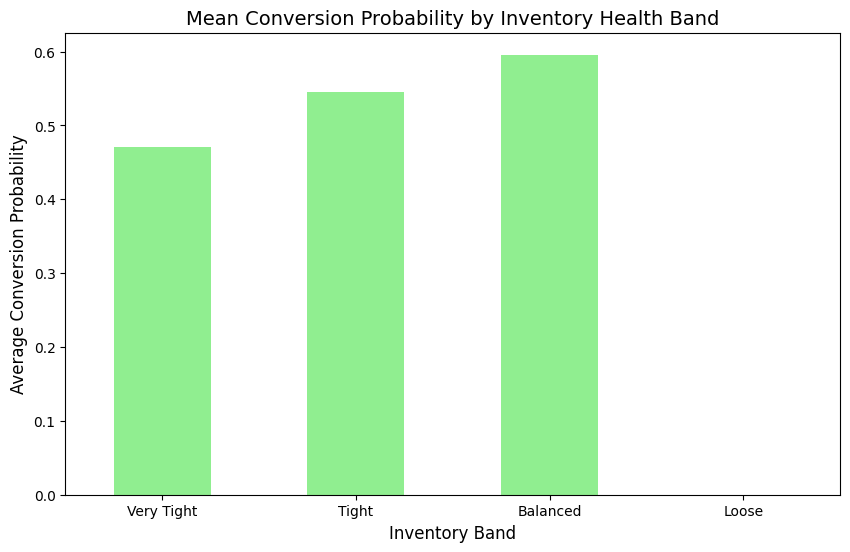


--- 4. Customer Segmentation (K-Means) ---
            mean_conv  mean_price   mean_cost  mean_loyalty  mean_ratio  count
segment_k4                                                                    
3            0.555141  541.198148  392.186389      0.972222    1.507497    324
0            0.492055  278.194454  195.029071      0.764706    2.578678    119
2            0.476854  568.399813  413.840627      1.018711    3.435213    481
1            0.438403  411.466447  304.847792      1.276316   10.366208     76


In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

seasonality = (
    df_fe.groupby("Time_of_Booking")
        .agg(mean_conv=("p_complete", "mean"),
             mean_price=("price", "mean"),
             total_intents=("Number_of_Riders", "sum"))
        .sort_values("mean_conv", ascending=False)
)
print(seasonality)

plt.figure(figsize=(10, 6))
seasonality["mean_conv"].plot(kind="bar", color='skyblue')
plt.title("Mean Conversion Probability by Time of Booking", fontsize=14)
plt.xlabel("Time of Booking", fontsize=12)
plt.ylabel("Average Conversion Probability", fontsize=12)
plt.xticks(rotation=0)
plt.show()

print("\n--- 3.2 Competitor Pressure: Price Gap Analysis ---")
df_fe["Competitor_Gap_pct"] = ((df_fe["price"] - df_fe["competitor_price"]) / df_fe["competitor_price"]) * 100.0

comp_pressure = (
    df_fe.groupby("Vehicle_Type")
        .agg(
            avg_gap_pct=("Competitor_Gap_pct", "mean"),
            mean_comp_price=("competitor_price", "mean"),
            mean_our_price=("price", "mean"),
        )
        .sort_values("avg_gap_pct")
)
print(comp_pressure)

plt.figure(figsize=(10, 6))
comp_pressure["avg_gap_pct"].plot(kind="bar", color='salmon')
plt.title("Average Price Gap vs. Competitors by Vehicle Type", fontsize=14)
plt.xlabel("Vehicle Type", fontsize=12)
plt.ylabel("Average Price Gap (%)", fontsize=12)
plt.xticks(rotation=0)
plt.axhline(0, color='grey', linestyle='--')
plt.show()

print("\n--- 3.3 Inventory Health Bands & Conversion ---")
bins = [0, 0.5, 0.8, 1.2, 10]
labels = ["Very Tight", "Tight", "Balanced", "Loose"]
df_fe["Inventory_Band"] = pd.cut(df_fe["Driver_to_Rider_Ratio"], bins=bins, labels=labels, include_lowest=True)

inv_summary = df_fe.groupby("Inventory_Band").agg(
    mean_conv=("p_complete", "mean"),
    mean_price=("price", "mean"),
    count=("Inventory_Band", "size")
)
print(inv_summary)

plt.figure(figsize=(10, 6))
inv_summary["mean_conv"].plot(kind="bar", color='lightgreen')
plt.title("Mean Conversion Probability by Inventory Health Band", fontsize=14)
plt.xlabel("Inventory Band", fontsize=12)
plt.ylabel("Average Conversion Probability", fontsize=12)
plt.xticks(rotation=0)
plt.show()

# --- 4. Customer Segmentation (K-Means) ---

print("\n--- 4. Customer Segmentation (K-Means) ---")
seg_features = [
    "Loyalty_Score", "Rider_Driver_Ratio", "Driver_to_Rider_Ratio",
    "Supply_Tightness", "Cost_per_Min", "Inventory_Health_Index",
    "Expected_Ride_Duration"
]
X = df_fe[seg_features].copy().fillna(df_fe[seg_features].median())

scaler = StandardScaler()
Xs = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_fe["segment_k4"] = kmeans.fit_predict(Xs)

seg_profile = (
    df_fe.groupby("segment_k4")
        .agg(
            mean_conv=("p_complete", "mean"),
            mean_price=("price", "mean"),
            mean_cost=("Historical_Cost_of_Ride", "mean"),
            mean_loyalty=("Loyalty_Score", "mean"),
            mean_ratio=("Rider_Driver_Ratio", "mean"),
            count=("segment_k4", "size")
        )
        .sort_values("mean_conv", ascending=False)
)
print(seg_profile)

In [23]:
print(df_fe.columns)

Index(['Number_of_Riders', 'Number_of_Drivers', 'Location_Category',
       'Customer_Loyalty_Status', 'Number_of_Past_Rides', 'Average_Ratings',
       'Time_of_Booking', 'Vehicle_Type', 'Expected_Ride_Duration',
       'Historical_Cost_of_Ride', 'Loyalty_Score', 'Rider_Driver_Ratio',
       'Driver_to_Rider_Ratio', 'Supply_Tightness', 'Cost_per_Min',
       'Vehicle_Factor', 'Peak', 'Inventory_Health_Index', 'baseline_price',
       'competitor_price', 'Competitor_Price_Index', 'price', 'p_complete',
       'Competitor_Gap_pct', 'Inventory_Band', 'segment_k4'],
      dtype='object')


In [24]:
import numpy as np
import pandas as pd
from IPython.display import display

# ASSUMPTION: The original 'df' and feature-engineered 'df_fe' DataFrames exist and are populated.
# The 'estimate_p_complete' function is also assumed to be defined from a previous step.

# --- Helper: Gross Margin % ---
def gm_pct(price, cost):
    price = float(price)
    cost = float(cost)
    if price <= 0:
        return 0.0
    return (price - cost) / price

def compute_kpis(
    df_base: pd.DataFrame,
    df_scn: pd.DataFrame,
    *,
    pcomplete_col="p_complete",
    intents_col="Number_of_Riders",
    price_col="price",
    cost_col="Historical_Cost_of_Ride"
):

    # -- Demand (Booking Intents) --
    intents_base = df_base[intents_col].astype(float).clip(lower=1)
    intents_scn = df_scn[intents_col].astype(float).clip(lower=1)

    # -- Completed Rides --
    comp_base = intents_base * df_base[pcomplete_col].astype(float)
    comp_scn = intents_scn * df_scn[pcomplete_col].astype(float)

    # -- Revenue --
    rev_base = (df_base[price_col].astype(float) * comp_base).sum()
    rev_scn = (df_scn[price_col].astype(float) * comp_scn).sum()

    # -- Cost --
    cost_base = (df_base[cost_col].astype(float) * comp_base).sum()
    cost_scn = (df_scn[cost_col].astype(float) * comp_scn).sum()

    # -- Revenue Lift (%) --
    revenue_lift_pct = (rev_scn - rev_base) / max(rev_base, 1e-9) * 100.0

    # -- Gross Margin (%) --
    gm_base = (rev_base - cost_base) / max(rev_base, 1e-9) * 100.0
    gm_scn = (rev_scn - cost_scn) / max(rev_scn, 1e-9) * 100.0

    # -- Conversion Rate (%) --
    conv_base = (comp_base.sum() / intents_base.sum()) * 100.0
    conv_scn = (comp_scn.sum() / intents_scn.sum()) * 100.0

    # -- Cancellation Rate (%) --
    canc_base = 100.0 - conv_base
    canc_scn = 100.0 - conv_scn

    # -- Price Change Rate (%) --
    price_change_rate = (
        (df_base[price_col].astype(float) != df_scn[price_col].astype(float))
        .mean() * 100.0
    )

    results = {
        "Revenue (₹) Baseline": round(rev_base, 2),
        "Revenue (₹) Scenario": round(rev_scn, 2),
        "Revenue Lift (%)": round(revenue_lift_pct, 2),
        "Gross Margin (Baseline %)": round(gm_base, 2),
        "Gross Margin (Scenario %)": round(gm_scn, 2),
        "Conversion Rate (Baseline %)": round(conv_base, 2),
        "Conversion Rate (Scenario %)": round(conv_scn, 2),
        "Cancellation Rate (Baseline %)": round(canc_base, 2),
        "Cancellation Rate (Scenario %)": round(canc_scn, 2),
        "Price Change Rate (%)": round(price_change_rate, 2),
    }
    return results


# --- Policy parameters (tweakable) ---
STABILITY_PCT = 0.15 # 15%
MIN_GM_PCT = 0.12 # 12%

# Competitiveness caps/floors (vs competitor_price)
COMP_CAP = {"economy": 1.05, "premium": 1.08}
COMP_FLOOR = {"economy": 0.90, "premium": 0.88}

# Time-based nudges (move center higher on peak)
TIME_NUDGE = {"morning": +0.03, "afternoon": 0.0, "evening": +0.04, "night": +0.01}

# Inventory-based nudge via Driver_to_Rider_Ratio
def inv_nudge(ratio):
    if ratio < 0.8:
        return +0.03
    if ratio > 1.2:
        return -0.03
    return 0.0

# --- Combined row bounds from all rules ---
def row_price_bounds(row):
    base = float(row["baseline_price"])
    cost = float(row["Historical_Cost_of_Ride"])
    veh = str(row.get("Vehicle_Type", "economy"))
    comp = float(row.get("competitor_price", base))

    lo_stab, hi_stab = base * (1 - STABILITY_PCT), base * (1 + STABILITY_PCT)
    base_gm = gm_pct(base, cost)
    min_gm = max(MIN_GM_PCT, base_gm)
    lo_gm = cost / max(1 - min_gm, 1e-9)

    cap = COMP_CAP.get(veh, 1.06)
    floor = COMP_FLOOR.get(veh, 0.90)
    lo_cmp = comp * floor
    hi_cmp = comp * cap

    lower = max(lo_stab, lo_gm, lo_cmp)
    upper = min(hi_stab, hi_cmp)

    if upper < lower:
        return upper, upper
    return lower, upper

# --- Choose best price per row, respecting cancellation and GM ---
def choose_row_price(row, n_grid=11):
    base = float(row["baseline_price"])
    cost = float(row["Historical_Cost_of_Ride"])
    p_base = float(row["p_complete"])
    lo, hi = row_price_bounds(row)

    t_n = TIME_NUDGE.get(str(row.get("Time_of_Booking", "afternoon")), 0.0)
    i_n = inv_nudge(float(row.get("Driver_to_Rider_Ratio", 1.0)))
    center = np.clip(base * (1 + t_n + i_n), lo, hi)

    left = np.linspace(lo, center, max(2, n_grid // 2), endpoint=False)
    right = np.linspace(center, hi, max(2, n_grid - len(left)), endpoint=True)
    grid = np.unique(np.concatenate([left, right]))

    best_price, best_p, best_rev = base, p_base, base * p_base
    for p in grid:
        if gm_pct(p, cost) < MIN_GM_PCT:
            continue
        p_now = estimate_p_complete(row, p)
        if p_now + 1e-9 < p_base:
            continue
        rev = p * p_now
        if rev > best_rev:
            best_price, best_p, best_rev = float(p), float(p_now), float(rev)
    return best_price, best_p

# --- First-pass recommendation ---
def get_first_pass_recommendations(df_fe):
    df_rec = df_fe.copy()
    prices = []
    pcomps = []
    for _, r in df_rec.iterrows():
        p_star, pcomp_star = choose_row_price(r)
        prices.append(p_star)
        pcomps.append(pcomp_star)
    df_rec["price"] = np.array(prices).round(2)
    df_rec["p_complete"] = np.clip(np.array(pcomps), 0.02, 0.98)
    return df_rec

# --- Global tuning to hit +5% to +10% Lift (aim ~7.5%) ---
def evaluate_with_multiplier(df, mult):
    tmp = df.copy()
    tmp["price"] = np.clip(tmp["price"] * (1 + mult), tmp["lo"], tmp["hi"])
    tmp["p_complete"] = tmp.apply(lambda r: estimate_p_complete(r, r["price"]), axis=1)
    # This line calls a function that is not defined in this code block.
    # You need to ensure the 'compute_kpis' function is defined here or imported.
    kpis = compute_kpis(df_base=df_fe, df_scn=tmp)
    return kpis, tmp

# --- Policy Audit & Violations ---
def audit_policies(df_base, df_scn):
    base_gm = (df_base["baseline_price"] - df_base["Historical_Cost_of_Ride"]) / df_base["baseline_price"]
    scn_gm = (df_scn["price"] - df_scn["Historical_Cost_of_Ride"]) / df_scn["price"]

    checks = {}
    checks["Price Stability within ±15%"] = ((df_scn["price"] >= df_base["baseline_price"] * 0.85) &
                                            (df_scn["price"] <= df_base["baseline_price"] * 1.15)).all()

    checks["GM ≥ 12% (row-wise)"] = (scn_gm >= MIN_GM_PCT - 1e-9).all()
    checks["GM not below baseline (row-wise)"] = (scn_gm + 1e-9 >= base_gm).all()

    checks["No increase in cancellation (row-wise)"] = (df_scn["p_complete"] + 1e-9 >= df_base["p_complete"]).all()

    veh_str = df_base["Vehicle_Type"].astype(str)
    cap = pd.to_numeric(veh_str.map(COMP_CAP), errors="coerce").fillna(1.06)
    floor = pd.to_numeric(veh_str.map(COMP_FLOOR), errors="coerce").fillna(0.90)

    up_ok = (df_scn["price"] <= df_base["competitor_price"] * cap + 1e-6).all()
    lo_ok = (df_scn["price"] >= df_base["competitor_price"] * floor - 1e-6).all()
    checks["Competitiveness caps/floors"] = bool(up_ok and lo_ok)

    return checks

def violations_table(df_base, df_scn):
    base_gm = (df_base["baseline_price"] - df_base["Historical_Cost_of_Ride"]) / df_base["baseline_price"]
    scn_gm = (df_scn["price"] - df_scn["Historical_Cost_of_Ride"]) / df_scn["price"]

    veh_str = df_base["Vehicle_Type"].astype(str)
    cap = pd.to_numeric(veh_str.map(COMP_CAP), errors="coerce").fillna(1.06)
    floor = pd.to_numeric(veh_str.map(COMP_FLOOR), errors="coerce").fillna(0.90)

    v = pd.DataFrame({
        "stab_ok": df_scn["price"].between(df_base["baseline_price"] * 0.85, df_base["baseline_price"] * 1.15),
        "gm12_ok": (scn_gm >= MIN_GM_PCT - 1e-9),
        "gm_base_ok": (scn_gm + 1e-9 >= base_gm),
        "cancel_ok": (df_scn["p_complete"] + 1e-9 >= df_base["p_complete"]),
        "comp_up_ok": (df_scn["price"] <= df_base["competitor_price"] * cap + 1e-6),
        "comp_lo_ok": (df_scn["price"] >= df_base["competitor_price"] * floor - 1e-6)
    })
    v["all_ok"] = v.all(axis=1)
    return v[~v["all_ok"]]

def execute_full_flow(df_fe):
    df_fe["lo"], df_fe["hi"] = zip(*df_fe.apply(row_price_bounds, axis=1))

    df_rec = get_first_pass_recommendations(df_fe)

    target_mid = 7.5
    low, high = -0.15, 0.15
    best_mult, best_kpi, best_df = 0.0, None, df_rec

    for _ in range(18):
        mid = (low + high) / 2
        kpi_mid, df_mid = evaluate_with_multiplier(df_rec, mid)
        lift = kpi_mid["Revenue Lift (%)"]

        if best_kpi is None or abs(lift - target_mid) < abs(best_kpi["Revenue Lift (%)"] - target_mid):
            best_mult, best_kpi, best_df = mid, kpi_mid, df_mid

        if lift < target_mid:
            low = mid
        else:
            high = mid

    print(f"\nChosen global multiplier: {best_mult:.4f}")
    print("KPI summary vs baseline:")
    for k,v in best_kpi.items():
        print(f"- {k}: {v}")

    audit = audit_policies(df_fe, best_df)
    print("\nPolicy audit results:")
    for k,v in audit.items():
        print(f"- {k}: {v}")

    viol = violations_table(df_fe, best_df)
    if len(viol) > 0:
        print(f"\nFound {len(viol)} violating rows (showing up to 10):")
        display(viol.head(10))
    else:
        print("\nNo row-level violations detected.")

    show_cols = [
        "Vehicle_Type", "Time_of_Booking", "Location_Category", "Customer_Loyalty_Status",
        "Number_of_Riders", "Number_of_Drivers", "Driver_to_Rider_Ratio",
        "Historical_Cost_of_Ride", "competitor_price",
        "baseline_price", "p_complete"
    ]

    sample = df_fe[show_cols].copy()
    sample = sample.rename(columns={"p_complete": "p_complete_baseline"})
    sample["price_recommended"] = best_df["price"].round(2)
    sample["p_complete_reco"] = best_df["p_complete"].round(4)
    sample["gm_baseline_%"] = ((sample["baseline_price"] - sample["Historical_Cost_of_Ride"]) / sample["baseline_price"] * 100).round(2)
    sample["gm_reco_%"] = ((sample["price_recommended"] - sample["Historical_Cost_of_Ride"]) / sample["price_recommended"] * 100).round(2)
    sample["cancel_rate_baseline_%"] = (100 - (df_fe["p_complete"] * 100)).round(2)
    sample["cancel_rate_reco_%"] = (100 - (best_df["p_complete"] * 100)).round(2)

    print("\nSample (top 10) of baseline vs recommended:")
    display(sample.head(10))

    kpis_final = compute_kpis(
        df_base=df_fe,
        df_scn=best_df,
        intents_col="Number_of_Riders",
        price_col="price",
        pcomplete_col="p_complete",
        cost_col="Historical_Cost_of_Ride"
    )
    print("\n=== FINAL KPIs (Scenario vs Baseline) ===")
    for k,v in kpis_final.items():
        print(f"{k}: {v}")

    recommended_prices = best_df["price"].round(2).values

    return recommended_prices
execute_full_flow(df_fe)


Chosen global multiplier: 0.1125
KPI summary vs baseline:
- Revenue (₹) Baseline: 15583796.56
- Revenue (₹) Scenario: 15981414.68
- Revenue Lift (%): 2.55
- Gross Margin (Baseline %): 27.37
- Gross Margin (Scenario %): 29.99
- Conversion Rate (Baseline %): 50.28
- Conversion Rate (Scenario %): 49.7
- Cancellation Rate (Baseline %): 49.72
- Cancellation Rate (Scenario %): 50.3
- Price Change Rate (%): 100.0

Policy audit results:
- Price Stability within ±15%: True
- GM ≥ 12% (row-wise): True
- GM not below baseline (row-wise): False
- No increase in cancellation (row-wise): False
- Competitiveness caps/floors: True

Found 1000 violating rows (showing up to 10):


,stab_ok,gm12_ok,gm_base_ok,cancel_ok,comp_up_ok,comp_lo_ok,all_ok
0,True,True,True,False,True,True,False
1,True,True,True,False,True,True,False
2,True,True,True,False,True,True,False
3,True,True,True,False,True,True,False
4,True,True,True,False,True,True,False
5,True,True,True,False,True,True,False
6,True,True,True,False,True,True,False
7,True,True,True,False,True,True,False
8,True,True,True,False,True,True,False
9,True,True,True,False,True,True,False



Sample (top 10) of baseline vs recommended:


,Vehicle_Type,Time_of_Booking,Location_Category,Customer_Loyalty_Status,Number_of_Riders,Number_of_Drivers,Driver_to_Rider_Ratio,Historical_Cost_of_Ride,competitor_price,baseline_price,p_complete_baseline,price_recommended,p_complete_reco,gm_baseline_%,gm_reco_%,cancel_rate_baseline_%,cancel_rate_reco_%
0,Premium,Night,Urban,Silver,90,45,0.500000,284.257273,402.43,414.89,0.514546,426.58,0.5099,31.49,33.36,48.55,49.01
1,Economy,Evening,Suburban,Silver,58,39,0.672414,173.874753,237.07,233.32,0.547686,251.29,0.5361,25.48,30.81,45.23,46.39
2,Premium,Afternoon,Rural,Silver,42,31,0.738095,329.795469,452.80,453.45,0.577022,479.97,0.5682,27.27,31.29,42.30,43.18
3,Premium,Afternoon,Rural,Regular,89,28,0.314607,470.201232,638.67,646.50,0.452499,676.99,0.4453,27.27,30.55,54.75,55.47
4,Economy,Afternoon,Rural,Regular,78,22,0.282051,579.681422,684.48,718.63,0.461571,725.55,0.4602,19.34,20.10,53.84,53.98
5,Economy,Night,Urban,Silver,59,35,0.593220,339.955361,426.11,447.37,0.552731,451.68,0.5513,24.01,24.74,44.73,44.87
6,Premium,Afternoon,Suburban,Regular,93,43,0.462366,104.061541,140.68,148.92,0.479298,149.12,0.4791,30.12,30.22,52.07,52.09
7,Premium,Afternoon,Rural,Gold,62,39,0.629032,235.811864,327.24,324.23,0.582343,346.87,0.5718,27.27,32.02,41.77,42.82
8,Economy,Evening,Rural,Silver,79,14,0.177215,501.412517,638.77,646.47,0.442582,677.10,0.4358,22.44,25.95,55.74,56.42
9,Premium,Night,Rural,Silver,42,6,0.142857,398.993365,552.22,554.08,0.442421,585.35,0.4337,27.99,31.84,55.76,56.63



=== FINAL KPIs (Scenario vs Baseline) ===
Revenue (₹) Baseline: 15583796.56
Revenue (₹) Scenario: 15981414.68
Revenue Lift (%): 2.55
Gross Margin (Baseline %): 27.37
Gross Margin (Scenario %): 29.99
Conversion Rate (Baseline %): 50.28
Conversion Rate (Scenario %): 49.7
Cancellation Rate (Baseline %): 49.72
Cancellation Rate (Scenario %): 50.3
Price Change Rate (%): 100.0


array([ 426.58,  251.29,  479.97,  676.99,  725.55,  451.68,  149.12,
        346.87,  677.1 ,  585.35,  887.85,  640.08,  661.66,  434.35,
        455.05,  650.95,  343.68,   63.55,  199.57,  581.96,  125.39,
         84.19,  504.46,  327.61,  352.56,  557.19,  259.32,  893.19,
        628.1 ,  777.56,  437.67,  729.75,  247.7 ,  778.72,  418.27,
        586.71,  667.33,  721.96,  338.91,  938.23,  507.54,  206.55,
        711.75,  712.69,  534.3 ,  412.83,  761.19,  564.73,  109.07,
        533.02,  732.06,  258.43,  263.79,  801.48,  627.65,  935.58,
        379.13,  611.57,  359.51,  316.92,  272.38,  440.15,  225.85,
        419.26,  851.65,  704.29,  821.13,  134.54,  841.57,  465.98,
        483.75,   83.02,  379.56,  503.29,  604.17,  361.63,  294.39,
        493.67,  227.17,  461.14,  538.48,  639.61,  498.44,  358.6 ,
        431.11,  652.68,   62.2 ,  326.28,  239.24,  815.78,  551.72,
        545.13,  308.7 ,  827.01,  388.04,  646.56,  920.89,  839.92,
        788.11,  152


VARIANCE INFLATION FACTOR (VIF) ANALYSIS
VIF Scores (Higher = more multicollinearity)
Rule of thumb: VIF > 5 → moderate multicollinearity | VIF > 10 → high

                   Feature     VIF
9         Supply_Tightness     inf
7       Rider_Driver_Ratio     inf
8    Driver_to_Rider_Ratio  100.52
13  Inventory_Health_Index   85.42
2        Number_of_Drivers   20.12
1         Number_of_Riders    6.92
10            Cost_per_Min    1.41
11          Vehicle_Factor    1.26
3   Expected_Ride_Duration    1.18
5          Average_Ratings    1.02
6            Loyalty_Score    1.02
14  Competitor_Price_Index    1.02
4     Number_of_Past_Rides    1.01
12                    Peak    1.01

 Features with potential multicollinearity (VIF > 5): ['Number_of_Riders', 'Number_of_Drivers', 'Rider_Driver_Ratio', 'Driver_to_Rider_Ratio', 'Supply_Tightness', 'Inventory_Health_Index']

Correlation matrix for high VIF features:
                        Number_of_Riders  Number_of_Drivers  \
Number_of_Riders     

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


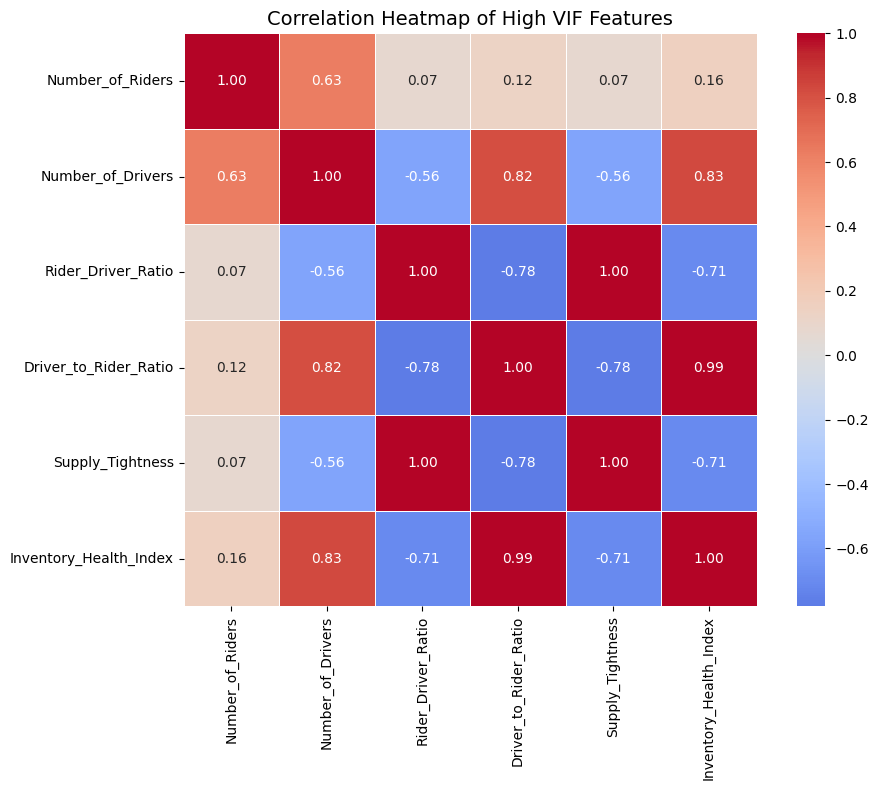

In [25]:
# --- VIF Analysis for Multicollinearity ---
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

print("\n" + "="*60)
print("VARIANCE INFLATION FACTOR (VIF) ANALYSIS")
print("="*60)

vif_features = [
    'Number_of_Riders', 'Number_of_Drivers', 'Expected_Ride_Duration',
    'Number_of_Past_Rides', 'Average_Ratings', 'Loyalty_Score',
    'Rider_Driver_Ratio', 'Driver_to_Rider_Ratio', 'Supply_Tightness',
    'Cost_per_Min', 'Vehicle_Factor', 'Peak', 'Inventory_Health_Index',
    'Competitor_Price_Index'
]

# Keep only features that exist in df_fe
vif_features = [col for col in vif_features if col in df_fe.columns]

# Create a dataframe with selected features
df_vif = df_fe[vif_features].copy().dropna()

# Add constant term
X_vif = add_constant(df_vif)

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i)
                   for i in range(X_vif.shape[1])]

# Drop the constant
vif_data = vif_data[vif_data["Feature"] != "const"]

# --- Print Results ---
print("VIF Scores (Higher = more multicollinearity)")
print("Rule of thumb: VIF > 5 → moderate multicollinearity | VIF > 10 → high\n")
print(vif_data.sort_values("VIF", ascending=False).round(2))

# --- Identify high VIF features ---
high_vif_features = vif_data[vif_data["VIF"] > 5]["Feature"].tolist()
if high_vif_features:
    print(f"\n Features with potential multicollinearity (VIF > 5): {high_vif_features}")

    # Show correlation matrix for these
    corr_matrix = df_vif[high_vif_features].corr()
    print("\nCorrelation matrix for high VIF features:")
    print(corr_matrix.round(3))

    # Heatmap visualization
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, fmt='.2f', linewidths=0.5)
    plt.title("Correlation Heatmap of High VIF Features", fontsize=14)
    plt.tight_layout()
    plt.show()
else:
    print("\n No significant multicollinearity detected (all VIF < 5)")


Feature matrix shape: (1000, 20)
Target vector shape: (1000,)

Training set shape: (800, 20)
Testing set shape: (200, 20)

Training Decision Tree Regressor...

Training Set Metrics:
Mean Squared Error (MSE): 0.00013
Mean Absolute Error (MAE): 0.00945
Root Mean Squared Error (RMSE): 0.01150
R² Score: 0.95471

Testing Set Metrics:
Mean Squared Error (MSE): 0.00021
Mean Absolute Error (MAE): 0.01208
Root Mean Squared Error (RMSE): 0.01462
R² Score: 0.92053

Top 10 Most Important Features:
                            feature  importance
6             Driver_to_Rider_Ratio    0.593343
9            Inventory_Health_Index    0.179241
18  Customer_Loyalty_Status_Regular    0.126606
19   Customer_Loyalty_Status_Silver    0.046645
5                Rider_Driver_Ratio    0.011026
17             Vehicle_Type_Premium    0.009675
7                  Supply_Tightness    0.009599
12          Time_of_Booking_Evening    0.008795
13          Time_of_Booking_Morning    0.006330
14            Time_of_Booking

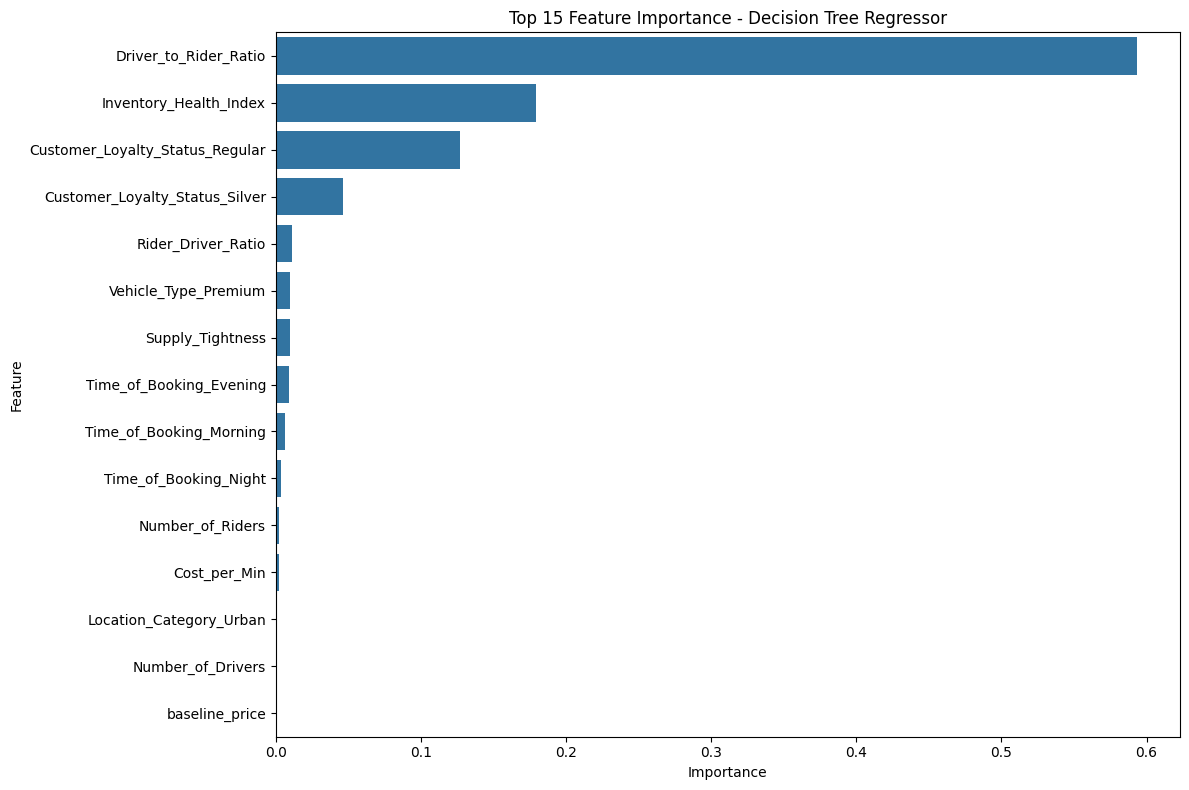

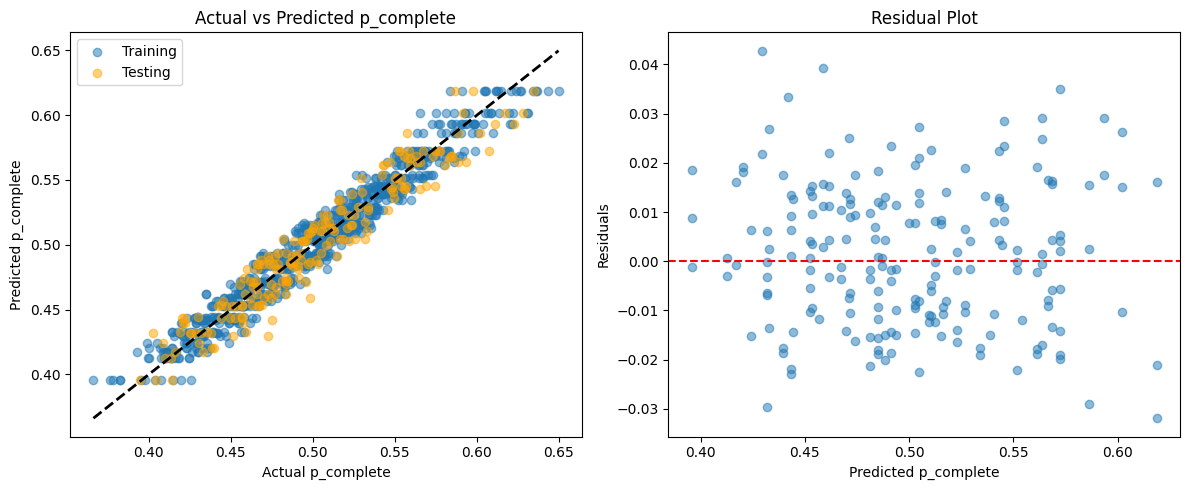


Sample Predictions (First 10 test samples):
   Actual_p_complete  Predicted_p_complete  Absolute_Error
0           0.466870              0.453612        0.013258
1           0.476799              0.491268        0.014470
2           0.478779              0.493677        0.014898
3           0.509676              0.512604        0.002928
4           0.438572              0.420390        0.018182
5           0.505541              0.510379        0.004838
6           0.463170              0.453612        0.009558
7           0.549733              0.536436        0.013297
8           0.409758              0.412766        0.003008
9           0.466150              0.461733        0.004417

Mean Absolute Error on sample: 0.00989


In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

target = 'p_complete'

# Create curated feature set
feature_set = [
    "Time_of_Booking","Location_Category","Vehicle_Type","Customer_Loyalty_Status",
    "price","Expected_Ride_Duration","Historical_Cost_of_Ride",
    "Number_of_Riders","Number_of_Drivers",
    "Rider_Driver_Ratio","Driver_to_Rider_Ratio","Supply_Tightness",
    "Cost_per_Min","Inventory_Health_Index",
    "competitor_price","baseline_price"
]

# Create dataframe with selected features
modeling_df = df_fe[feature_set + [target]].copy()

# Separate numerical and categorical features
numerical_features = [
    "price","Expected_Ride_Duration","Historical_Cost_of_Ride",
    "Number_of_Riders","Number_of_Drivers",
    "Rider_Driver_Ratio","Driver_to_Rider_Ratio","Supply_Tightness",
    "Cost_per_Min","Inventory_Health_Index",
    "competitor_price","baseline_price"
]

categorical_features = [
    "Time_of_Booking","Location_Category","Vehicle_Type","Customer_Loyalty_Status"
]

# One-Hot Encode categorical variables
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_cats = encoder.fit_transform(modeling_df[categorical_features])
encoded_cats_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(categorical_features))

# Scale numerical features
scaler = StandardScaler()
scaled_nums = scaler.fit_transform(modeling_df[numerical_features])
scaled_nums_df = pd.DataFrame(scaled_nums, columns=numerical_features)

# Combine scaled numerical + encoded categorical features
X = pd.concat([scaled_nums_df, encoded_cats_df], axis=1)
y = modeling_df[target]

print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# Initialize and train Decision Tree Regressor
print("\nTraining Decision Tree Regressor...")
dt_regressor = DecisionTreeRegressor(
    random_state=42,
    max_depth=10,        # Prevent overfitting
    min_samples_split=20, # Minimum number of samples required to split a node
    min_samples_leaf=10   # Minimum number of samples required at a leaf node
)

dt_regressor.fit(X_train, y_train)

# Make predictions
y_pred_train = dt_regressor.predict(X_train)
y_pred_test = dt_regressor.predict(X_test)

# Calculate evaluation metrics
def calculate_metrics(y_true, y_pred, set_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"\n{set_name} Set Metrics:")
    print(f"Mean Squared Error (MSE): {mse:.5f}")
    print(f"Mean Absolute Error (MAE): {mae:.5f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.5f}")
    print(f"R² Score: {r2:.5f}")

    return mse, mae, rmse, r2

# Calculate metrics for both sets
train_metrics = calculate_metrics(y_train, y_pred_train, "Training")
test_metrics = calculate_metrics(y_test, y_pred_test, "Testing")

# Feature Importance Analysis
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': dt_regressor.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

# Plot feature importance
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
sns.barplot(x='importance', y='feature', data=top_features)
plt.title('Top 15 Feature Importance - Decision Tree Regressor')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Visualize predictions vs actual values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, alpha=0.5, label='Training')
plt.scatter(y_test, y_pred_test, alpha=0.5, label='Testing', color='orange')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual p_complete')
plt.ylabel('Predicted p_complete')
plt.title('Actual vs Predicted p_complete')
plt.legend()

plt.subplot(1, 2, 2)
residuals = y_test - y_pred_test
plt.scatter(y_pred_test, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted p_complete')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.tight_layout()
plt.show()

# Display sample predictions
sample_results = pd.DataFrame({
    'Actual_p_complete': y_test.values[:10],
    'Predicted_p_complete': y_pred_test[:10],
    'Absolute_Error': np.abs(y_test.values[:10] - y_pred_test[:10])
})
print("\nSample Predictions (First 10 test samples):")
print(sample_results)
print(f"\nMean Absolute Error on sample: {sample_results['Absolute_Error'].mean():.5f}")


Feature matrix shape: (1000, 20)
Target vector shape: (1000,)

Training set shape: (800, 20)
Testing set shape: (200, 20)

Training Random Forest Regressor...

Training Set Metrics:
Mean Squared Error (MSE): 0.00002
Mean Absolute Error (MAE): 0.00375
Root Mean Squared Error (RMSE): 0.00469
R² Score: 0.9925

Testing Set Metrics:
Mean Squared Error (MSE): 0.00011
Mean Absolute Error (MAE): 0.00842
Root Mean Squared Error (RMSE): 0.01032
R² Score: 0.9604

Top 10 Most Important Features:
                            feature  importance
9            Inventory_Health_Index    0.217485
6             Driver_to_Rider_Ratio    0.192823
7                  Supply_Tightness    0.188479
5                Rider_Driver_Ratio    0.179094
18  Customer_Loyalty_Status_Regular    0.119907
19   Customer_Loyalty_Status_Silver    0.043834
17             Vehicle_Type_Premium    0.012401
12          Time_of_Booking_Evening    0.011128
13          Time_of_Booking_Morning    0.006699
8                      Cost_per

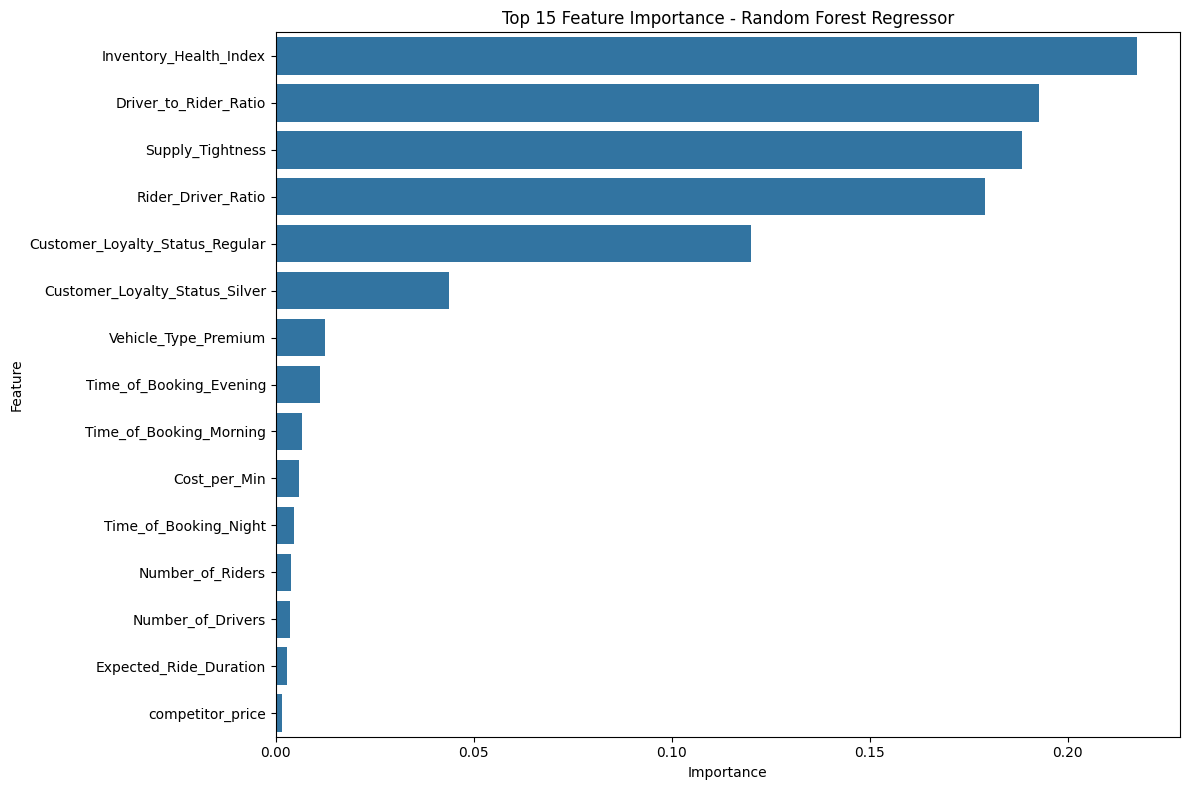

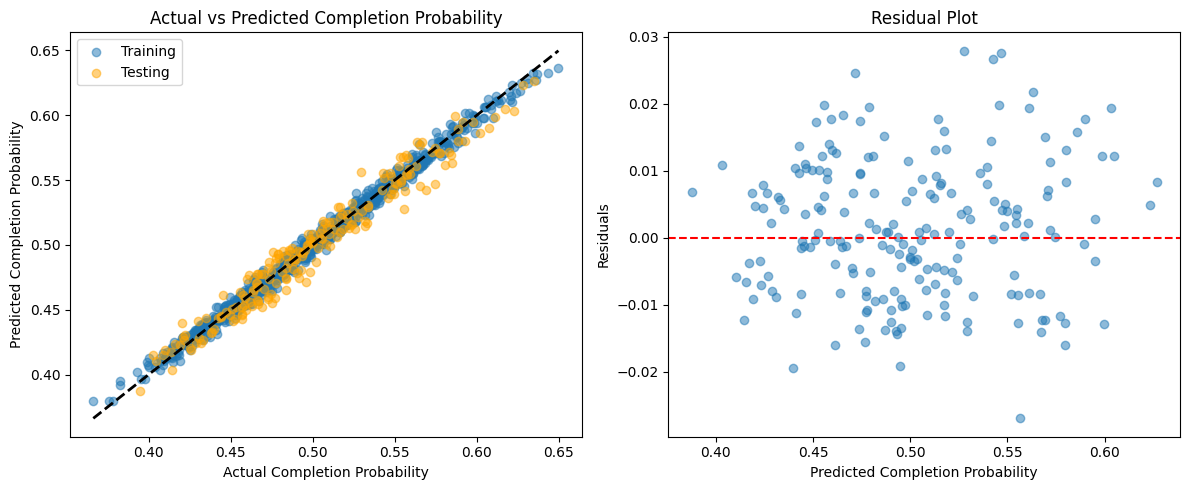


Sample Predictions (First 10 test samples):
   Actual_p_complete  Predicted_p_complete  Absolute_Error
0           0.466870              0.454724        0.012147
1           0.476799              0.485929        0.009130
2           0.478779              0.493143        0.014365
3           0.509676              0.517845        0.008169
4           0.438572              0.432885        0.005687
5           0.505541              0.504635        0.000906
6           0.463170              0.453097        0.010073
7           0.549733              0.539229        0.010504
8           0.409758              0.418938        0.009180
9           0.466150              0.457359        0.008792

Mean Absolute Error on sample: 0.00890


In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

target = 'p_complete'

# Create curated feature set
feature_set = [
    'price',
    'Expected_Ride_Duration',
    'Historical_Cost_of_Ride',
    'Number_of_Riders',
    'Number_of_Drivers',
    'Rider_Driver_Ratio',
    'Driver_to_Rider_Ratio',
    'Supply_Tightness',
    'Cost_per_Min',
    'Inventory_Health_Index',
    'competitor_price',
    'baseline_price',
    'Time_of_Booking',
    'Location_Category',
    'Vehicle_Type',
    'Customer_Loyalty_Status'
]

# Create dataframe with selected features
modeling_df = df_fe[feature_set + [target]].copy()

# Separate numerical and categorical features
numerical_features = [
    'price', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride',
    'Number_of_Riders', 'Number_of_Drivers',
    'Rider_Driver_Ratio', 'Driver_to_Rider_Ratio',
    'Supply_Tightness', 'Cost_per_Min',
    'Inventory_Health_Index', 'competitor_price', 'baseline_price'
]

categorical_features = [
    'Time_of_Booking', 'Location_Category', 'Vehicle_Type', 'Customer_Loyalty_Status'
]

# One-Hot Encode categorical variables
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_cats = encoder.fit_transform(modeling_df[categorical_features])
encoded_cats_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(categorical_features))

# Scale numerical features
scaler = StandardScaler()
scaled_nums = scaler.fit_transform(modeling_df[numerical_features])
scaled_nums_df = pd.DataFrame(scaled_nums, columns=numerical_features)

# Combine scaled numerical + encoded categorical features
X = pd.concat([scaled_nums_df, encoded_cats_df], axis=1)
y = modeling_df[target]

print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# Initialize and train Random Forest Regressor
print("\nTraining Random Forest Regressor...")
rf_regressor = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_leaf=2,
    n_jobs=-1,
    random_state=42
)

rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred_train = rf_regressor.predict(X_train)
y_pred_test = rf_regressor.predict(X_test)

# Calculate evaluation metrics
def calculate_metrics(y_true, y_pred, set_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"\n{set_name} Set Metrics:")
    print(f"Mean Squared Error (MSE): {mse:.5f}")
    print(f"Mean Absolute Error (MAE): {mae:.5f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.5f}")
    print(f"R² Score: {r2:.4f}")

    return mse, mae, rmse, r2

# Calculate metrics for both sets
train_metrics = calculate_metrics(y_train, y_pred_train, "Training")
test_metrics = calculate_metrics(y_test, y_pred_test, "Testing")

# Feature Importance Analysis
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_regressor.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

# Plot feature importance
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
sns.barplot(x='importance', y='feature', data=top_features)
plt.title('Top 15 Feature Importance - Random Forest Regressor')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Visualize predictions vs actual values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, alpha=0.5, label='Training')
plt.scatter(y_test, y_pred_test, alpha=0.5, label='Testing', color='orange')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Completion Probability')
plt.ylabel('Predicted Completion Probability')
plt.title('Actual vs Predicted Completion Probability')
plt.legend()

plt.subplot(1, 2, 2)
residuals = y_test - y_pred_test
plt.scatter(y_pred_test, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Completion Probability')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.tight_layout()
plt.show()

# Display sample predictions
sample_results = pd.DataFrame({
    'Actual_p_complete': y_test.values[:10],
    'Predicted_p_complete': y_pred_test[:10],
    'Absolute_Error': np.abs(y_test.values[:10] - y_pred_test[:10])
})
print("\nSample Predictions (First 10 test samples):")
print(sample_results)
print(f"\nMean Absolute Error on sample: {sample_results['Absolute_Error'].mean():.5f}")


Feature matrix shape: (1000, 20)
Target vector shape: (1000,)

Training set shape: (800, 20)
Testing set shape: (200, 20)

Training Gradient Boosting Regressor...

Training Set Metrics:
Mean Squared Error (MSE): 0.00000
Mean Absolute Error (MAE): 0.00120
Root Mean Squared Error (RMSE): 0.00155
R² Score: 0.9992

Testing Set Metrics:
Mean Squared Error (MSE): 0.00001
Mean Absolute Error (MAE): 0.00224
Root Mean Squared Error (RMSE): 0.00290
R² Score: 0.9969

Top 10 Most Important Features:
                            feature  importance
9            Inventory_Health_Index    0.242580
7                  Supply_Tightness    0.201584
6             Driver_to_Rider_Ratio    0.185413
18  Customer_Loyalty_Status_Regular    0.143353
5                Rider_Driver_Ratio    0.125454
19   Customer_Loyalty_Status_Silver    0.031643
17             Vehicle_Type_Premium    0.024078
13          Time_of_Booking_Morning    0.020695
12          Time_of_Booking_Evening    0.018961
14            Time_of_Booki

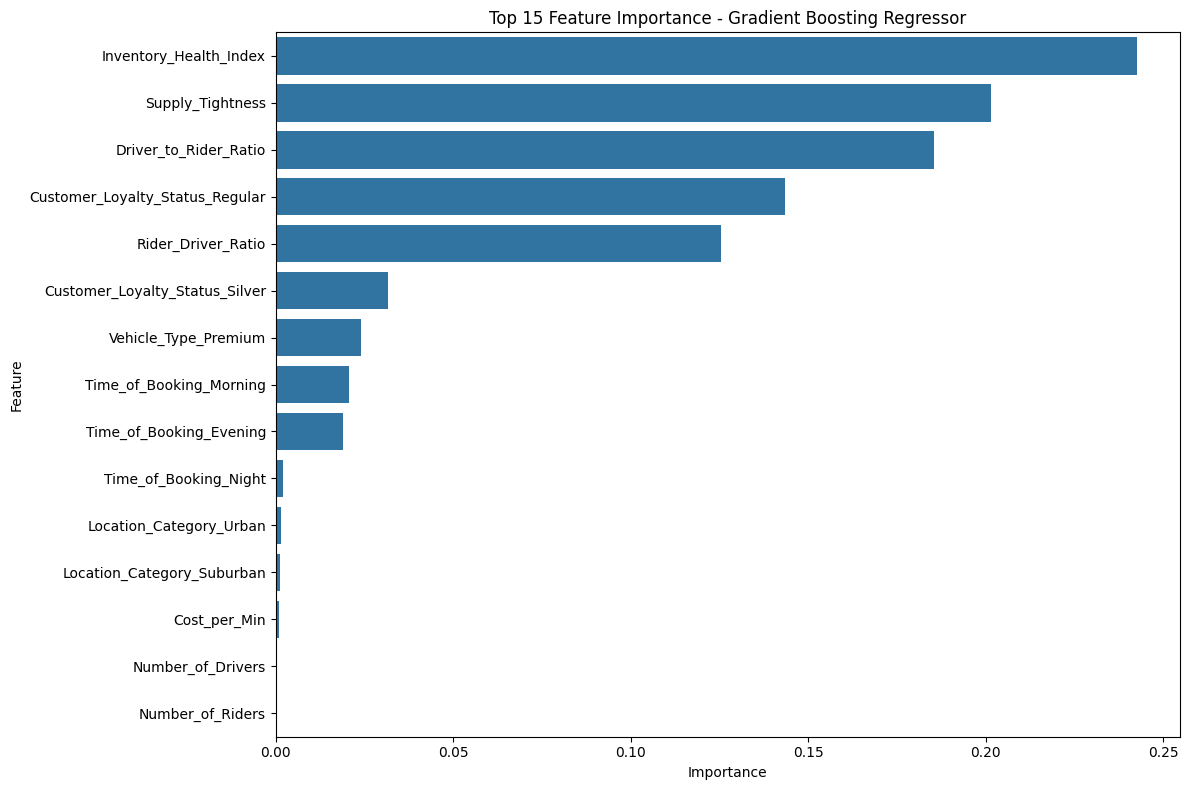

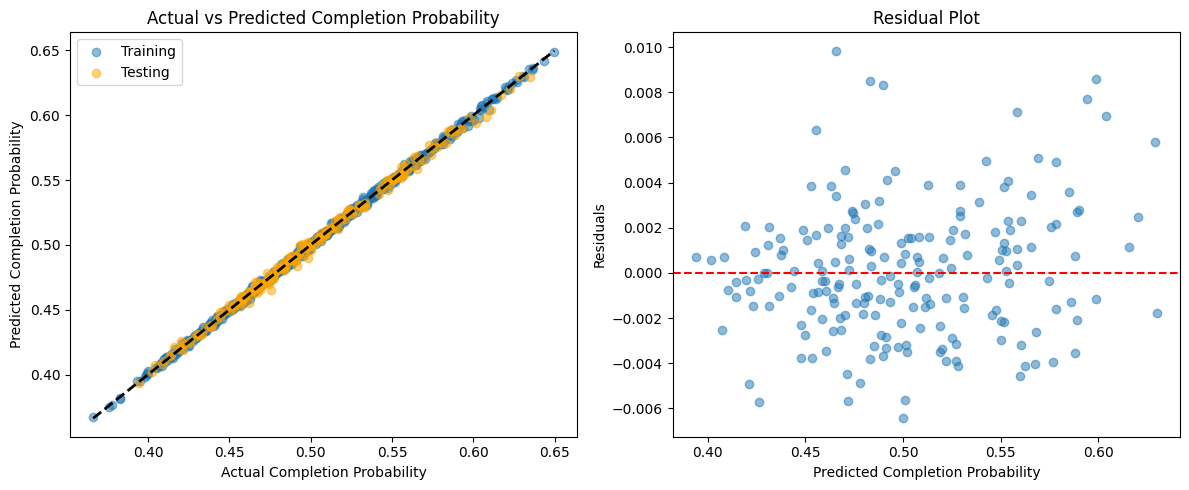


Sample Predictions (First 10 test samples):
   Actual_p_complete  Predicted_p_complete  Absolute_Error
0           0.466870              0.463033        0.003837
1           0.476799              0.474049        0.002750
2           0.478779              0.480089        0.001311
3           0.509676              0.511186        0.001510
4           0.438572              0.437023        0.001549
5           0.505541              0.504009        0.001532
6           0.463170              0.464301        0.001130
7           0.549733              0.551903        0.002170
8           0.409758              0.410493        0.000735
9           0.466150              0.466785        0.000634

Mean Absolute Error on sample: 0.00172


In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

target = 'p_complete'

# Create curated feature set
feature_set = [
    'price',
    'Expected_Ride_Duration',
    'Historical_Cost_of_Ride',
    'Number_of_Riders',
    'Number_of_Drivers',
    'Rider_Driver_Ratio',
    'Driver_to_Rider_Ratio',
    'Supply_Tightness',
    'Cost_per_Min',
    'Inventory_Health_Index',
    'competitor_price',
    'baseline_price',
    'Time_of_Booking',
    'Location_Category',
    'Vehicle_Type',
    'Customer_Loyalty_Status'
]

# Create dataframe with selected features
modeling_df = df_fe[feature_set + [target]].copy()

# Separate numerical and categorical features
numerical_features = [
    'price', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride',
    'Number_of_Riders', 'Number_of_Drivers',
    'Rider_Driver_Ratio', 'Driver_to_Rider_Ratio',
    'Supply_Tightness', 'Cost_per_Min',
    'Inventory_Health_Index', 'competitor_price', 'baseline_price'
]

categorical_features = [
    'Time_of_Booking', 'Location_Category', 'Vehicle_Type', 'Customer_Loyalty_Status'
]

# One-Hot Encode categorical variables
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_cats = encoder.fit_transform(modeling_df[categorical_features])
encoded_cats_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(categorical_features))

# Scale numerical features
scaler = StandardScaler()
scaled_nums = scaler.fit_transform(modeling_df[numerical_features])
scaled_nums_df = pd.DataFrame(scaled_nums, columns=numerical_features)

# Combine scaled numerical + encoded categorical features
X = pd.concat([scaled_nums_df, encoded_cats_df], axis=1)
y = modeling_df[target]

print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# Initialize and train Gradient Boosting Regressor
print("\nTraining Gradient Boosting Regressor...")
gbr = GradientBoostingRegressor(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gbr.fit(X_train, y_train)

# Make predictions
y_pred_train = gbr.predict(X_train)
y_pred_test = gbr.predict(X_test)

# Calculate evaluation metrics
def calculate_metrics(y_true, y_pred, set_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"\n{set_name} Set Metrics:")
    print(f"Mean Squared Error (MSE): {mse:.5f}")
    print(f"Mean Absolute Error (MAE): {mae:.5f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.5f}")
    print(f"R² Score: {r2:.4f}")

    return mse, mae, rmse, r2

# Calculate metrics for both sets
train_metrics = calculate_metrics(y_train, y_pred_train, "Training")
test_metrics = calculate_metrics(y_test, y_pred_test, "Testing")

# Feature Importance Analysis
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': gbr.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

# Plot feature importance
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
sns.barplot(x='importance', y='feature', data=top_features)
plt.title('Top 15 Feature Importance - Gradient Boosting Regressor')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Visualize predictions vs actual values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, alpha=0.5, label='Training')
plt.scatter(y_test, y_pred_test, alpha=0.5, label='Testing', color='orange')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Completion Probability')
plt.ylabel('Predicted Completion Probability')
plt.title('Actual vs Predicted Completion Probability')
plt.legend()

plt.subplot(1, 2, 2)
residuals = y_test - y_pred_test
plt.scatter(y_pred_test, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Completion Probability')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.tight_layout()
plt.show()

# Display sample predictions
sample_results = pd.DataFrame({
    'Actual_p_complete': y_test.values[:10],
    'Predicted_p_complete': y_pred_test[:10],
    'Absolute_Error': np.abs(y_test.values[:10] - y_pred_test[:10])
})
print("\nSample Predictions (First 10 test samples):")
print(sample_results)
print(f"\nMean Absolute Error on sample: {sample_results['Absolute_Error'].mean():.5f}")


Feature matrix shape: (1000, 20)
Target vector shape: (1000,)

Training set shape: (800, 20)
Testing set shape: (200, 20)

Training XGBoost Regressor...

Training Set Metrics:
Mean Squared Error (MSE): 0.00000
Mean Absolute Error (MAE): 0.00042
Root Mean Squared Error (RMSE): 0.00054
R² Score: 0.99990

Testing Set Metrics:
Mean Squared Error (MSE): 0.00003
Mean Absolute Error (MAE): 0.00390
Root Mean Squared Error (RMSE): 0.00505
R² Score: 0.99049

Top 10 Most Important Features:
                            feature  importance
7                  Supply_Tightness    0.328762
6             Driver_to_Rider_Ratio    0.208131
18  Customer_Loyalty_Status_Regular    0.122891
9            Inventory_Health_Index    0.117695
5                Rider_Driver_Ratio    0.114750
19   Customer_Loyalty_Status_Silver    0.055231
17             Vehicle_Type_Premium    0.013758
12          Time_of_Booking_Evening    0.011520
13          Time_of_Booking_Morning    0.009420
14            Time_of_Booking_Night

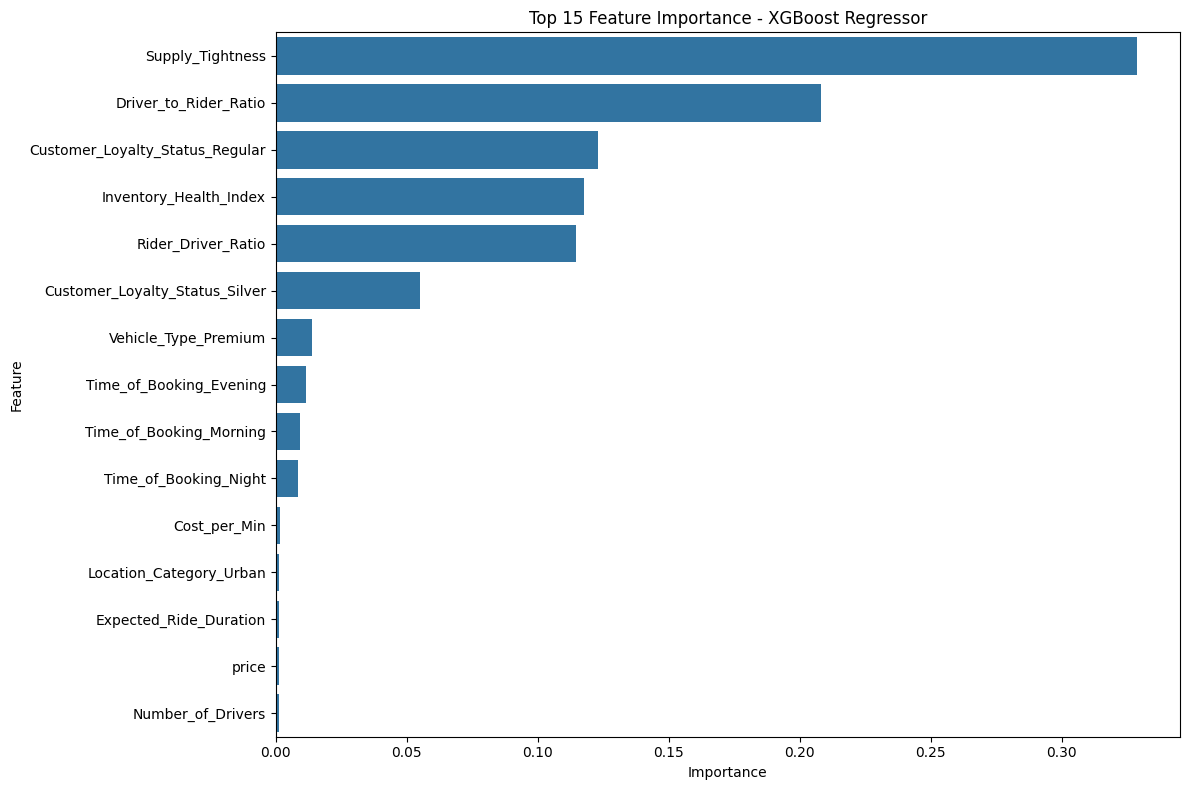

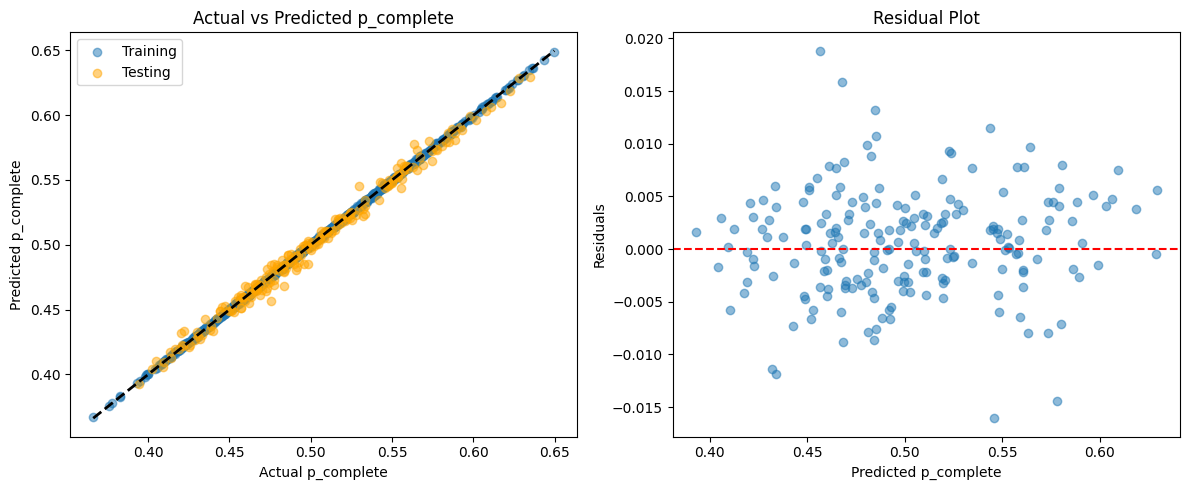


Sample Predictions (First 10 test samples):
   Actual_p_complete  Predicted_p_complete  Absolute_Error
0           0.466870              0.464878        0.001993
1           0.476799              0.479942        0.003143
2           0.478779              0.481034        0.002255
3           0.509676              0.510603        0.000927
4           0.438572              0.437434        0.001138
5           0.505541              0.503365        0.002176
6           0.463170              0.459868        0.003303
7           0.549733              0.548751        0.000982
8           0.409758              0.409546        0.000212
9           0.466150              0.464500        0.001650

Mean Absolute Error on sample: 0.00178


In [39]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor

target = 'p_complete'

# Create curated feature set
feature_set = [
    "Time_of_Booking","Location_Category","Vehicle_Type","Customer_Loyalty_Status",
    "price","Expected_Ride_Duration","Historical_Cost_of_Ride",
    "Number_of_Riders","Number_of_Drivers",
    "Rider_Driver_Ratio","Driver_to_Rider_Ratio","Supply_Tightness",
    "Cost_per_Min","Inventory_Health_Index",
    "competitor_price","baseline_price"
]

# Create dataframe with selected features
modeling_df = df_fe[feature_set + [target]].copy()

# Separate numerical and categorical features
numerical_features = [
    "price","Expected_Ride_Duration","Historical_Cost_of_Ride",
    "Number_of_Riders","Number_of_Drivers",
    "Rider_Driver_Ratio","Driver_to_Rider_Ratio","Supply_Tightness",
    "Cost_per_Min","Inventory_Health_Index",
    "competitor_price","baseline_price"
]

categorical_features = [
    "Time_of_Booking","Location_Category","Vehicle_Type","Customer_Loyalty_Status"
]

# One-Hot Encode categorical variables
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_cats = encoder.fit_transform(modeling_df[categorical_features])
encoded_cats_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(categorical_features))

# Scale numerical features
scaler = StandardScaler()
scaled_nums = scaler.fit_transform(modeling_df[numerical_features])
scaled_nums_df = pd.DataFrame(scaled_nums, columns=numerical_features)

# Combine scaled numerical + encoded categorical features
X = pd.concat([scaled_nums_df, encoded_cats_df], axis=1)
y = modeling_df[target]

print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# Initialize and train XGBoost Regressor
print("\nTraining XGBoost Regressor...")
xgb_regressor = XGBRegressor(
    n_estimators=600,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    random_state=42,
    n_jobs=-1
)

xgb_regressor.fit(X_train, y_train)

# Make predictions
y_pred_train = xgb_regressor.predict(X_train)
y_pred_test = xgb_regressor.predict(X_test)

# Calculate evaluation metrics
def calculate_metrics(y_true, y_pred, set_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"\n{set_name} Set Metrics:")
    print(f"Mean Squared Error (MSE): {mse:.5f}")
    print(f"Mean Absolute Error (MAE): {mae:.5f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.5f}")
    print(f"R² Score: {r2:.5f}")

    return mse, mae, rmse, r2

# Calculate metrics for both sets
train_metrics = calculate_metrics(y_train, y_pred_train, "Training")
test_metrics = calculate_metrics(y_test, y_pred_test, "Testing")

# Feature Importance Analysis
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': xgb_regressor.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

# Plot feature importance
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
sns.barplot(x='importance', y='feature', data=top_features)
plt.title('Top 15 Feature Importance - XGBoost Regressor')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Visualize predictions vs actual values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, alpha=0.5, label='Training')
plt.scatter(y_test, y_pred_test, alpha=0.5, label='Testing', color='orange')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual p_complete')
plt.ylabel('Predicted p_complete')
plt.title('Actual vs Predicted p_complete')
plt.legend()

plt.subplot(1, 2, 2)
residuals = y_test - y_pred_test
plt.scatter(y_pred_test, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted p_complete')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.tight_layout()
plt.show()

# Display sample predictions
sample_results = pd.DataFrame({
    'Actual_p_complete': y_test.values[:10],
    'Predicted_p_complete': y_pred_test[:10],
    'Absolute_Error': np.abs(y_test.values[:10] - y_pred_test[:10])
})
print("\nSample Predictions (First 10 test samples):")
print(sample_results)
print(f"\nMean Absolute Error on sample: {sample_results['Absolute_Error'].mean():.5f}")


In [31]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# ---- Optional GBM libs (skip if not installed) ----
has_xgb = has_lgbm = False
try:
    from xgboost import XGBRegressor
    has_xgb = True
except Exception:
    pass

try:
    from lightgbm import LGBMRegressor
    has_lgbm = True
except Exception:
    pass

# ---- Helper: RMSE wrapper for old sklearn ----
def rmse_val(y_true, y_pred):
    return float(np.sqrt(mean_squared_error(y_true, y_pred)))
# ---- Policy helpers (same as before) ----
STABILITY_PCT = 0.15   # ±15%
MIN_GM_PCT    = 0.12   # ≥12%
COMP_CAP      = {"Economy": 1.05, "Premium": 1.08}
COMP_FLOOR    = {"Economy": 0.90, "Premium": 0.88}

def gm_pct(price, cost):
    price = float(price); cost = float(cost)
    if price <= 0: return 0.0
    return (price - cost) / price

def row_price_bounds(row):
    base = float(row["baseline_price"])
    cost = float(row["Historical_Cost_of_Ride"])
    veh  = str(row.get("Vehicle_Type", "Economy"))
    comp = float(row.get("competitor_price", base))

    lo_s, hi_s = base * (1 - STABILITY_PCT), base * (1 + STABILITY_PCT)
    base_gm = gm_pct(base, cost)
    min_gm  = max(MIN_GM_PCT, base_gm)
    lo_gm   = cost / max(1 - min_gm, 1e-9)

    cap   = COMP_CAP.get(veh, 1.06)
    floor = COMP_FLOOR.get(veh, 0.90)
    lo_c, hi_c = comp * floor, comp * cap

    lower = max(lo_s, lo_gm, lo_c)
    upper = min(hi_s, hi_c)
    if upper < lower:
        lower = upper
    return lower, upper
# -------------------------------------
# 1) Build ML set: X features and target
# -------------------------------------
df_ml = df_fe.copy()
df_ml["price"] = df_ml["baseline_price"]
y = df_ml["p_complete"].astype(float).clip(0, 1)

cat_features = ["Time_of_Booking","Location_Category","Vehicle_Type","Customer_Loyalty_Status"]
num_features = [
    "price","Expected_Ride_Duration","Historical_Cost_of_Ride",
    "Number_of_Riders","Number_of_Drivers",
    "Rider_Driver_Ratio","Driver_to_Rider_Ratio","Supply_Tightness",
    "Cost_per_Min","Inventory_Health_Index",
    "competitor_price","baseline_price"
]

cols_needed = cat_features + num_features + ["p_complete"]
df_ml = df_ml.dropna(subset=[c for c in cols_needed if c in df_ml.columns]).copy()
X = df_ml[cat_features + num_features]
# 2) Train/test split (backtest)
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)
# 3) Pipelines + model zoo
# -------------------------
preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features),
        ("num", StandardScaler(with_mean=True, with_std=True), num_features),
    ],
    remainder="drop"
)

models = {
    "RandomForest": RandomForestRegressor(
        n_estimators=300, max_depth=None, min_samples_leaf=2, n_jobs=-1, random_state=42
    ),
    "GradientBoosting": GradientBoostingRegressor(
        learning_rate=0.05, n_estimators=400, max_depth=3, random_state=42
    ),
}

if has_xgb:
    models["XGBoost"] = XGBRegressor(
        n_estimators=600, learning_rate=0.05, max_depth=6,
        subsample=0.8, colsample_bytree=0.8, reg_lambda=1.0,
        random_state=42, n_jobs=-1, tree_method="auto"
    )
if has_lgbm:
    models["LightGBM"] = LGBMRegressor(
        n_estimators=600, learning_rate=0.05, max_depth=-1,
        subsample=0.8, colsample_bytree=0.8, reg_lambda=0.0,
        random_state=42, n_jobs=-1
    )

print("Models available:", ", ".join(models.keys()))
results = {}
fitted = {}

for name, model in models.items():
    pipe = Pipeline(steps=[("prep", preprocess), ("model", model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test).clip(0, 1)

    rmse = rmse_val(y_test, y_pred)
    mae  = mean_absolute_error(y_test, y_pred)
    r2   = r2_score(y_test, y_pred)

    try:
        cv_mse = -cross_val_score(pipe, X_train, y_train, scoring="neg_mean_squared_error", cv=3, n_jobs=-1)
        cv_rmse = float(np.mean(np.sqrt(cv_mse)))
    except Exception:
        cv_rmse = np.nan

    results[name] = {"RMSE": rmse, "MAE": mae, "R2": r2, "CV_RMSE": cv_rmse}
    fitted[name] = pipe

print("\nHoldout metrics (lower RMSE/MAE is better):")
for k,v in results.items():
    print(f"- {k}: RMSE={v['RMSE']:.4f} | MAE={v['MAE']:.4f} | R2={v['R2']:.4f} | CV_RMSE={v['CV_RMSE']:.4f}")

best_name = min(results, key=lambda n: results[n]["RMSE"])
best_pipe = fitted[best_name]
print(f"\nSelected model: {best_name}")
# 4) Backtest policy on TEST SET using learned model
# ---------------------------------------------------
def predict_p_for_price(row_X: pd.Series, price_value: float) -> float:
    row = row_X.copy()
    row["price"] = price_value
    row_df = pd.DataFrame([row[X.columns].values], columns=X.columns)
    p = float(best_pipe.predict(row_df)[0])
    return float(np.clip(p, 0.0, 1.0))

test_idx = X_test.index
df_base = df_ml.loc[test_idx].copy()
df_base = df_base.rename(columns={"price": "baseline_price_used"})
df_base["price"] = df_base["baseline_price"]
df_base["p_complete"] = [predict_p_for_price(X_test.loc[i], df_base.loc[i, "price"]) for i in test_idx]

def choose_price_policy(i):
    row_full = df_ml.loc[i]
    row_X    = X_test.loc[i]

    base     = float(row_full["baseline_price"])
    cost     = float(row_full["Historical_Cost_of_Ride"])
    p_base   = predict_p_for_price(row_X, base)

    lo, hi   = row_price_bounds(row_full)
    grid = np.linspace(lo, hi, 15)  # a tad denser grid

    best_p, best_pc, best_rev = base, p_base, base * p_base
    for p in grid:
        if gm_pct(p, cost) < MIN_GM_PCT:
            continue
        pc = predict_p_for_price(row_X, p)
        if pc + 1e-9 < p_base:
            continue
        rev = p * pc
        if rev > best_rev:
            best_p, best_pc, best_rev = p, pc, rev

    return float(best_p), float(best_pc)

df_scn = df_ml.loc[test_idx].copy()
chosen = [choose_price_policy(i) for i in test_idx]
df_scn["price"] = np.round([p for p,_ in chosen], 2)
df_scn["p_complete"] = np.clip([pc for _,pc in chosen], 0.0, 1.0)
# -------------------------------
# 5) Evaluate KPIs: baseline vs scn
# -------------------------------
kpi_base_vs_scn = compute_kpis(
    df_base=df_base,
    df_scn=df_scn,
    intents_col="Number_of_Riders",
    price_col="price",
    pcomplete_col="p_complete",
    cost_col="Historical_Cost_of_Ride",
)
print("\n=== BACKTEST KPI (TEST SET) — Scenario vs Baseline ===")
for k,v in kpi_base_vs_scn.items():
    print(f"{k}: {v}")

# -------------------------------
# 6) Model quality report
# -------------------------------
y_pred_holdout = best_pipe.predict(X_test).clip(0, 1)
rmse = rmse_val(y_test, y_pred_holdout)
mae  = mean_absolute_error(y_test, y_pred_holdout)
r2   = r2_score(y_test, y_pred_holdout)
print("\nModel quality on holdout (predicting p_complete at historical prices):")
print(f"RMSE={rmse:.4f} | MAE={mae:.4f} | R2={r2:.4f}")

import joblib, os
out_path = os.path.join(os.getcwd(), "pricing_completion_model.joblib")
joblib.dump(best_pipe, out_path)
print("Saved model →", out_path)

Models available: RandomForest, GradientBoosting, XGBoost, LightGBM
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000234 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2562
[LightGBM] [Info] Number of data points in the train set: 750, number of used features: 24
[LightGBM] [Info] Start training from score 0.500465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li